# Load Data

In [1]:
import json, os
from google.colab import userdata

username = userdata.get('KAGGLE_USER')
key = userdata.get('KAGGLE_KEY')

os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump({"username": username, "key": key}, f)
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d e27085921/ds-jusrassic-dataset -p /content
!unzip -q /content/ds-jusrassic-dataset.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/e27085921/ds-jusrassic-dataset
License(s): unknown
100% 2.08G/2.08G [00:31<00:00, 84.7MB/s]
100% 2.08G/2.08G [00:31<00:00, 70.3MB/s]


# Training

TensorFlow version: 2.18.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Starting fossil classification training pipeline...

Step 1: Loading data...
Loaded data with shape: (9817, 118)

Step 2: Preprocessing data with balancing...
Missing values in SCI_NAME: 0
Missing values in PERIODFROM: 0

Processing SCI_NAME...
Original class distribution: 222 unique classes
Most common classes: {'Phuwiangosaurus sirindhornae': 2085, 'N/A (Dinosaur)': 1906, 'N/A (Brachiopod)': 1072, 'Sauropod': 1024, 'N/A (Crocodile)': 481}
Least common classes: {'cf. Nebenothyris sp.': 1, 'sclerorhynchid': 1, 'cf. Brachythyris sp.': 1, 'Hybodus aequitrident': 1, 'Tornquistia sp.': 1}
Found 40 rare classes with fewer than 2 samples
Grouped 40 rare classes into 'Other_rare_SCI_NAME'
Target samples per class: 6
Downsampling 5 majority classes
Upsampling 112 minority classes
After balancing: 1098 total samples
Class distribution after balancing:
  Min samples: 6
  Max samples: 6
  

Model: "enhanced_fossil_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 300, 300, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 300, 300, 32)   │            896 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 300, 300, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 300, 300, 32)   │          9,248 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 300, 300, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 150, 150, 32)   │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 150, 150, 32)   │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 150, 150, 64)   │         18,496 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 150, 150, 64)   │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 150, 150, 64)   │         36,928 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 150, 150, 64)   │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 75, 75, 64)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_7 (Dropout)       │ (None, 75, 75, 64)     │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 75, 75, 128)    │         73,856 │ dropout_7[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ numeric_input             │ (None, 21)             │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 75, 75, 128)    │            512 │ conv2d_4[0][0]         │
│ (BatchNormalization) 

 Total params: 1,870,698 (7.14 MB)

 Trainable params: 1,862,936 (7.11 MB)

 Non-trainable params: 7,762 (30.32 KB)

Model architecture visualization saved to '/content/model/model_architecture.png'

Step 6: Preparing training callbacks...

Step 7: Training model...
Epoch 1/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 11.7399 - period_output_accuracy: 0.1686 - period_output_loss: 3.1702 - period_output_top3_accuracy: 0.3219 - period_output_top5_accuracy: 0.4487 - sci_name_output_accuracy: 0.0077 - sci_name_output_loss: 5.6793 - sci_name_output_top3_accuracy: 0.0194 - sci_name_output_top5_accuracy: 0.0303   
Epoch 1: val_loss improved from inf to 10.22473, saving model to /content/model/enhanced_fossil_model_best.h5


28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - loss: 11.7223 - period_output_accuracy: 0.1721 - period_output_loss: 3.1547 - period_output_top3_accuracy: 0.3265 - period_output_top5_accuracy: 0.4531 - sci_name_output_accuracy: 0.0077 - sci_name_output_loss: 5.6771 - sci_name_output_top3_accuracy: 0.0194 - sci_name_output_top5_accuracy: 0.0303 - val_loss: 10.2247 - val_period_output_accuracy: 0.7091 - val_period_output_loss: 2.0999 - val_period_output_top3_accuracy: 0.8318 - val_period_output_top5_accuracy: 0.8591 - val_sci_name_output_accuracy: 0.0045 - val_sci_name_output_loss: 5.2142 - val_sci_name_output_top3_accuracy: 0.0227 - val_sci_name_output_top5_accuracy: 0.0318 - learning_rate: 0.0010
Epoch 2/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 9.4074 - period_output_accuracy: 0.6740 - period_output_loss: 1.2366 - period_output_top3_accuracy: 0.8167 - period_output_top5_accuracy: 0.8705 - sci_name_output_accuracy: 0.0196 - sci_name_output_loss: 5.2531 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 341ms/step - loss: 9.3976 - period_output_accuracy: 0.6766 - period_output_loss: 1.2280 - period_output_top3_accuracy: 0.8185 - period_output_top5_accuracy: 0.8718 - sci_name_output_accuracy: 0.0195 - sci_name_output_loss: 5.2517 - sci_name_output_top3_accuracy: 0.0437 - sci_name_output_top5_accuracy: 0.0650 - val_loss: 9.3593 - val_period_output_accuracy: 0.7545 - val_period_output_loss: 1.2669 - val_period_output_top3_accuracy: 0.8636 - val_period_output_top5_accuracy: 0.9182 - val_sci_name_output_accuracy: 0.0182 - val_sci_name_output_loss: 5.1688 - val_sci_name_output_top3_accuracy: 0.0364 - val_sci_name_output_top5_accuracy: 0.0682 - learning_rate: 0.0010
Epoch 3/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 8.3178 - period_output_accuracy: 0.8770 - period_output_loss: 0.5312 - period_output_top3_accuracy: 0.9435 - period_output_top5_accuracy: 0.9694 - sci_name_output_accuracy: 0.0461 - sci_name_output_loss: 4.8574 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - loss: 8.3177 - period_output_accuracy: 0.8764 - period_output_loss: 0.5325 - period_output_top3_accuracy: 0.9433 - period_output_top5_accuracy: 0.9692 - sci_name_output_accuracy: 0.0462 - sci_name_output_loss: 4.8558 - sci_name_output_top3_accuracy: 0.0954 - sci_name_output_top5_accuracy: 0.1421 - val_loss: 8.8974 - val_period_output_accuracy: 0.7500 - val_period_output_loss: 0.9178 - val_period_output_top3_accuracy: 0.9091 - val_period_output_top5_accuracy: 0.9409 - val_sci_name_output_accuracy: 0.0227 - val_sci_name_output_loss: 5.0536 - val_sci_name_output_top3_accuracy: 0.0636 - val_sci_name_output_top5_accuracy: 0.1000 - learning_rate: 0.0010
Epoch 4/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 7.7358 - period_output_accuracy: 0.8930 - period_output_loss: 0.3739 - period_output_top3_accuracy: 0.9645 - period_output_top5_accuracy: 0.9789 - sci_name_output_accuracy: 0.0761 - sci_name_output_loss: 4.4335 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 327ms/step - loss: 7.7342 - period_output_accuracy: 0.8934 - period_output_loss: 0.3733 - period_output_top3_accuracy: 0.9645 - period_output_top5_accuracy: 0.9789 - sci_name_output_accuracy: 0.0763 - sci_name_output_loss: 4.4329 - sci_name_output_top3_accuracy: 0.1861 - sci_name_output_top5_accuracy: 0.2537 - val_loss: 8.5234 - val_period_output_accuracy: 0.7818 - val_period_output_loss: 0.7149 - val_period_output_top3_accuracy: 0.9273 - val_period_output_top5_accuracy: 0.9727 - val_sci_name_output_accuracy: 0.0182 - val_sci_name_output_loss: 4.8848 - val_sci_name_output_top3_accuracy: 0.0591 - val_sci_name_output_top5_accuracy: 0.1273 - learning_rate: 0.0010
Epoch 5/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 7.3605 - period_output_accuracy: 0.9288 - period_output_loss: 0.2443 - period_output_top3_accuracy: 0.9840 - period_output_top5_accuracy: 0.9950 - sci_name_output_accuracy: 0.0776 - sci_name_output_loss: 4.1935 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - loss: 7.3594 - period_output_accuracy: 0.9289 - period_output_loss: 0.2451 - period_output_top3_accuracy: 0.9837 - period_output_top5_accuracy: 0.9947 - sci_name_output_accuracy: 0.0776 - sci_name_output_loss: 4.1913 - sci_name_output_top3_accuracy: 0.1847 - sci_name_output_top5_accuracy: 0.2754 - val_loss: 8.2796 - val_period_output_accuracy: 0.7818 - val_period_output_loss: 0.6991 - val_period_output_top3_accuracy: 0.9364 - val_period_output_top5_accuracy: 0.9727 - val_sci_name_output_accuracy: 0.0409 - val_sci_name_output_loss: 4.6679 - val_sci_name_output_top3_accuracy: 0.1091 - val_sci_name_output_top5_accuracy: 0.1818 - learning_rate: 0.0010
Epoch 6/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 6.9641 - period_output_accuracy: 0.9207 - period_output_loss: 0.2294 - period_output_top3_accuracy: 0.9882 - period_output_top5_accuracy: 0.9964 - sci_name_output_accuracy: 0.1391 - sci_name_output_loss: 3.8249 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - loss: 6.9622 - period_output_accuracy: 0.9210 - period_output_loss: 0.2286 - period_output_top3_accuracy: 0.9882 - period_output_top5_accuracy: 0.9964 - sci_name_output_accuracy: 0.1386 - sci_name_output_loss: 3.8242 - sci_name_output_top3_accuracy: 0.2960 - sci_name_output_top5_accuracy: 0.3962 - val_loss: 7.8908 - val_period_output_accuracy: 0.8318 - val_period_output_loss: 0.5101 - val_period_output_top3_accuracy: 0.9636 - val_period_output_top5_accuracy: 0.9818 - val_sci_name_output_accuracy: 0.0773 - val_sci_name_output_loss: 4.4802 - val_sci_name_output_top3_accuracy: 0.1409 - val_sci_name_output_top5_accuracy: 0.2500 - learning_rate: 0.0010
Epoch 7/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 6.6526 - period_output_accuracy: 0.9323 - period_output_loss: 0.2057 - period_output_top3_accuracy: 0.9892 - period_output_top5_accuracy: 0.9976 - sci_name_output_accuracy: 0.1583 - sci_name_output_loss: 3.5528 - sci_name_output_top3_accurac

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - loss: 6.6530 - period_output_accuracy: 0.9327 - period_output_loss: 0.2060 - period_output_top3_accuracy: 0.9893 - period_output_top5_accuracy: 0.9976 - sci_name_output_accuracy: 0.1581 - sci_name_output_loss: 3.5538 - sci_name_output_top3_accuracy: 0.3422 - sci_name_output_top5_accuracy: 0.4779 - val_loss: 7.8485 - val_period_output_accuracy: 0.7773 - val_period_output_loss: 0.6202 - val_period_output_top3_accuracy: 0.9773 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.0591 - val_sci_name_output_loss: 4.3424 - val_sci_name_output_top3_accuracy: 0.1636 - val_sci_name_output_top5_accuracy: 0.2818 - learning_rate: 0.0010
Epoch 8/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 6.3527 - period_output_accuracy: 0.9590 - period_output_loss: 0.1501 - period_output_top3_accuracy: 0.9902 - period_output_top5_accuracy: 0.9986 - sci_name_output_accuracy: 0.1928 - sci_name_output_loss: 3.3237 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 348ms/step - loss: 6.3533 - period_output_accuracy: 0.9591 - period_output_loss: 0.1498 - period_output_top3_accuracy: 0.9903 - period_output_top5_accuracy: 0.9985 - sci_name_output_accuracy: 0.1923 - sci_name_output_loss: 3.3249 - sci_name_output_top3_accuracy: 0.3660 - sci_name_output_top5_accuracy: 0.5088 - val_loss: 7.7842 - val_period_output_accuracy: 0.7727 - val_period_output_loss: 0.6648 - val_period_output_top3_accuracy: 0.9773 - val_period_output_top5_accuracy: 0.9864 - val_sci_name_output_accuracy: 0.0682 - val_sci_name_output_loss: 4.2535 - val_sci_name_output_top3_accuracy: 0.1591 - val_sci_name_output_top5_accuracy: 0.2636 - learning_rate: 0.0010
Epoch 9/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - loss: 6.1744 - period_output_accuracy: 0.9768 - period_output_loss: 0.0985 - period_output_top3_accuracy: 0.9970 - period_output_top5_accuracy: 0.9982 - sci_name_output_accuracy: 0.2017 - sci_name_output_loss: 3.2138 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 331ms/step - loss: 6.1743 - period_output_accuracy: 0.9762 - period_output_loss: 0.0995 - period_output_top3_accuracy: 0.9969 - period_output_top5_accuracy: 0.9982 - sci_name_output_accuracy: 0.2015 - sci_name_output_loss: 3.2126 - sci_name_output_top3_accuracy: 0.4099 - sci_name_output_top5_accuracy: 0.5275 - val_loss: 7.1178 - val_period_output_accuracy: 0.8636 - val_period_output_loss: 0.3232 - val_period_output_top3_accuracy: 0.9773 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.1045 - val_sci_name_output_loss: 3.9458 - val_sci_name_output_top3_accuracy: 0.2409 - val_sci_name_output_top5_accuracy: 0.3636 - learning_rate: 0.0010
Epoch 10/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 5.9711 - period_output_accuracy: 0.9612 - period_output_loss: 0.1332 - period_output_top3_accuracy: 0.9955 - period_output_top5_accuracy: 0.9976 - sci_name_output_accuracy: 0.2314 - sci_name_output_loss: 2.9954 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - loss: 5.9698 - period_output_accuracy: 0.9615 - period_output_loss: 0.1328 - period_output_top3_accuracy: 0.9955 - period_output_top5_accuracy: 0.9976 - sci_name_output_accuracy: 0.2314 - sci_name_output_loss: 2.9946 - sci_name_output_top3_accuracy: 0.4500 - sci_name_output_top5_accuracy: 0.5820 - val_loss: 7.0466 - val_period_output_accuracy: 0.8682 - val_period_output_loss: 0.3509 - val_period_output_top3_accuracy: 0.9909 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.0909 - val_sci_name_output_loss: 3.8633 - val_sci_name_output_top3_accuracy: 0.2364 - val_sci_name_output_top5_accuracy: 0.3409 - learning_rate: 0.0010
Epoch 11/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 5.7886 - period_output_accuracy: 0.9759 - period_output_loss: 0.0912 - period_output_top3_accuracy: 0.9992 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.2456 - sci_name_output_loss: 2.8751 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - loss: 5.7885 - period_output_accuracy: 0.9758 - period_output_loss: 0.0915 - period_output_top3_accuracy: 0.9992 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.2456 - sci_name_output_loss: 2.8748 - sci_name_output_top3_accuracy: 0.4833 - sci_name_output_top5_accuracy: 0.6084 - val_loss: 6.6539 - val_period_output_accuracy: 0.9409 - val_period_output_loss: 0.1567 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.0909 - val_sci_name_output_loss: 3.6842 - val_sci_name_output_top3_accuracy: 0.2500 - val_sci_name_output_top5_accuracy: 0.3773 - learning_rate: 0.0010
Epoch 12/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 5.6911 - period_output_accuracy: 0.9793 - period_output_loss: 0.0954 - period_output_top3_accuracy: 0.9996 - period_output_top5_accuracy: 0.9996 - sci_name_output_accuracy: 0.2510 - sci_name_output_loss: 2.7943 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 335ms/step - loss: 5.6910 - period_output_accuracy: 0.9793 - period_output_loss: 0.0951 - period_output_top3_accuracy: 0.9996 - period_output_top5_accuracy: 0.9996 - sci_name_output_accuracy: 0.2511 - sci_name_output_loss: 2.7946 - sci_name_output_top3_accuracy: 0.4894 - sci_name_output_top5_accuracy: 0.6206 - val_loss: 6.4872 - val_period_output_accuracy: 0.9636 - val_period_output_loss: 0.1245 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.1045 - val_sci_name_output_loss: 3.5683 - val_sci_name_output_top3_accuracy: 0.2682 - val_sci_name_output_top5_accuracy: 0.4318 - learning_rate: 0.0010
Epoch 13/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 5.5509 - period_output_accuracy: 0.9783 - period_output_loss: 0.0977 - period_output_top3_accuracy: 0.9963 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.2935 - sci_name_output_loss: 2.6742 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - loss: 5.5511 - period_output_accuracy: 0.9784 - period_output_loss: 0.0975 - period_output_top3_accuracy: 0.9963 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.2931 - sci_name_output_loss: 2.6752 - sci_name_output_top3_accuracy: 0.5215 - sci_name_output_top5_accuracy: 0.6494 - val_loss: 6.0577 - val_period_output_accuracy: 0.9682 - val_period_output_loss: 0.1142 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.2000 - val_sci_name_output_loss: 3.1707 - val_sci_name_output_top3_accuracy: 0.3909 - val_sci_name_output_top5_accuracy: 0.5136 - learning_rate: 0.0010
Epoch 14/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 5.4075 - period_output_accuracy: 0.9882 - period_output_loss: 0.0671 - period_output_top3_accuracy: 0.9993 - period_output_top5_accuracy: 0.9993 - sci_name_output_accuracy: 0.2917 - sci_name_output_loss: 2.5828 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 342ms/step - loss: 5.2556 - period_output_accuracy: 0.9913 - period_output_loss: 0.0480 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.3022 - sci_name_output_loss: 2.4732 - sci_name_output_top3_accuracy: 0.5907 - sci_name_output_top5_accuracy: 0.6993 - val_loss: 5.9171 - val_period_output_accuracy: 0.9364 - val_period_output_loss: 0.1771 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.2091 - val_sci_name_output_loss: 3.0131 - val_sci_name_output_top3_accuracy: 0.4455 - val_sci_name_output_top5_accuracy: 0.5955 - learning_rate: 0.0010
Epoch 16/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 5.0850 - period_output_accuracy: 0.9796 - period_output_loss: 0.0757 - period_output_top3_accuracy: 0.9986 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.3522 - sci_name_output_loss: 2.2993 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 338ms/step - loss: 5.0881 - period_output_accuracy: 0.9797 - period_output_loss: 0.0758 - period_output_top3_accuracy: 0.9987 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.3514 - sci_name_output_loss: 2.3030 - sci_name_output_top3_accuracy: 0.5978 - sci_name_output_top5_accuracy: 0.7189 - val_loss: 5.6394 - val_period_output_accuracy: 0.9727 - val_period_output_loss: 0.1174 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.2545 - val_sci_name_output_loss: 2.8162 - val_sci_name_output_top3_accuracy: 0.5045 - val_sci_name_output_top5_accuracy: 0.6136 - learning_rate: 0.0010
Epoch 17/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 5.0288 - period_output_accuracy: 0.9840 - period_output_loss: 0.0689 - period_output_top3_accuracy: 0.9955 - period_output_top5_accuracy: 0.9999 - sci_name_output_accuracy: 0.3590 - sci_name_output_loss: 2.2725 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 5.0294 - period_output_accuracy: 0.9839 - period_output_loss: 0.0693 - period_output_top3_accuracy: 0.9955 - period_output_top5_accuracy: 0.9998 - sci_name_output_accuracy: 0.3584 - sci_name_output_loss: 2.2723 - sci_name_output_top3_accuracy: 0.5875 - sci_name_output_top5_accuracy: 0.7295 - val_loss: 5.5668 - val_period_output_accuracy: 0.9682 - val_period_output_loss: 0.1140 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.2318 - val_sci_name_output_loss: 2.7710 - val_sci_name_output_top3_accuracy: 0.4545 - val_sci_name_output_top5_accuracy: 0.6273 - learning_rate: 0.0010
Epoch 18/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 4.9729 - period_output_accuracy: 0.9796 - period_output_loss: 0.0610 - period_output_top3_accuracy: 0.9997 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.3533 - sci_name_output_loss: 2.2477 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - loss: 4.9746 - period_output_accuracy: 0.9795 - period_output_loss: 0.0614 - period_output_top3_accuracy: 0.9997 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.3526 - sci_name_output_loss: 2.2495 - sci_name_output_top3_accuracy: 0.5943 - sci_name_output_top5_accuracy: 0.6972 - val_loss: 5.1922 - val_period_output_accuracy: 0.9773 - val_period_output_loss: 0.1131 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.3273 - val_sci_name_output_loss: 2.4156 - val_sci_name_output_top3_accuracy: 0.5727 - val_sci_name_output_top5_accuracy: 0.6864 - learning_rate: 0.0010
Epoch 19/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 4.8283 - period_output_accuracy: 0.9823 - period_output_loss: 0.0717 - period_output_top3_accuracy: 0.9992 - period_output_top5_accuracy: 0.9994 - sci_name_output_accuracy: 0.3942 - sci_name_output_loss: 2.1149 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - loss: 4.8294 - period_output_accuracy: 0.9823 - period_output_loss: 0.0720 - period_output_top3_accuracy: 0.9991 - period_output_top5_accuracy: 0.9994 - sci_name_output_accuracy: 0.3937 - sci_name_output_loss: 2.1166 - sci_name_output_top3_accuracy: 0.6524 - sci_name_output_top5_accuracy: 0.7709 - val_loss: 4.8907 - val_period_output_accuracy: 0.9773 - val_period_output_loss: 0.0721 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.3545 - val_sci_name_output_loss: 2.1796 - val_sci_name_output_top3_accuracy: 0.6045 - val_sci_name_output_top5_accuracy: 0.6955 - learning_rate: 0.0010
Epoch 20/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 4.7190 - period_output_accuracy: 0.9824 - period_output_loss: 0.0534 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.3911 - sci_name_output_loss: 2.0458 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - loss: 4.5725 - period_output_accuracy: 0.9775 - period_output_loss: 0.0747 - period_output_top3_accuracy: 0.9978 - period_output_top5_accuracy: 0.9989 - sci_name_output_accuracy: 0.4252 - sci_name_output_loss: 1.9223 - sci_name_output_top3_accuracy: 0.6895 - sci_name_output_top5_accuracy: 0.7872 - val_loss: 4.6576 - val_period_output_accuracy: 0.9909 - val_period_output_loss: 0.0815 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.3364 - val_sci_name_output_loss: 2.0008 - val_sci_name_output_top3_accuracy: 0.6273 - val_sci_name_output_top5_accuracy: 0.7409 - learning_rate: 0.0010
Epoch 23/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 4.4490 - period_output_accuracy: 0.9802 - period_output_loss: 0.0864 - period_output_top3_accuracy: 0.9970 - period_output_top5_accuracy: 0.9985 - sci_name_output_accuracy: 0.4679 - sci_name_output_loss: 1.8079 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 353ms/step - loss: 4.4506 - period_output_accuracy: 0.9801 - period_output_loss: 0.0867 - period_output_top3_accuracy: 0.9970 - period_output_top5_accuracy: 0.9985 - sci_name_output_accuracy: 0.4674 - sci_name_output_loss: 1.8104 - sci_name_output_top3_accuracy: 0.6965 - sci_name_output_top5_accuracy: 0.7922 - val_loss: 4.5500 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0957 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4000 - val_sci_name_output_loss: 1.8979 - val_sci_name_output_top3_accuracy: 0.6364 - val_sci_name_output_top5_accuracy: 0.7455 - learning_rate: 0.0010
Epoch 24/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 4.3842 - period_output_accuracy: 0.9847 - period_output_loss: 0.0679 - period_output_top3_accuracy: 0.9994 - period_output_top5_accuracy: 0.9998 - sci_name_output_accuracy: 0.4637 - sci_name_output_loss: 1.7820 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - loss: 4.3865 - period_output_accuracy: 0.9845 - period_output_loss: 0.0687 - period_output_top3_accuracy: 0.9993 - period_output_top5_accuracy: 0.9998 - sci_name_output_accuracy: 0.4632 - sci_name_output_loss: 1.7844 - sci_name_output_top3_accuracy: 0.6953 - sci_name_output_top5_accuracy: 0.8163 - val_loss: 4.4573 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0848 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4136 - val_sci_name_output_loss: 1.8358 - val_sci_name_output_top3_accuracy: 0.6864 - val_sci_name_output_top5_accuracy: 0.7545 - learning_rate: 0.0010
Epoch 25/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 4.3096 - period_output_accuracy: 0.9879 - period_output_loss: 0.0407 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.4602 - sci_name_output_loss: 1.7536 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - loss: 4.3103 - period_output_accuracy: 0.9878 - period_output_loss: 0.0410 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.4604 - sci_name_output_loss: 1.7545 - sci_name_output_top3_accuracy: 0.6826 - sci_name_output_top5_accuracy: 0.7978 - val_loss: 4.3252 - val_period_output_accuracy: 0.9909 - val_period_output_loss: 0.0811 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4409 - val_sci_name_output_loss: 1.7305 - val_sci_name_output_top3_accuracy: 0.6955 - val_sci_name_output_top5_accuracy: 0.7818 - learning_rate: 0.0010
Epoch 26/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 4.2473 - period_output_accuracy: 0.9837 - period_output_loss: 0.0557 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.4945 - sci_name_output_loss: 1.6977 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - loss: 4.2464 - period_output_accuracy: 0.9837 - period_output_loss: 0.0556 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.4944 - sci_name_output_loss: 1.6969 - sci_name_output_top3_accuracy: 0.7384 - sci_name_output_top5_accuracy: 0.8305 - val_loss: 4.2379 - val_period_output_accuracy: 0.9909 - val_period_output_loss: 0.0605 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4455 - val_sci_name_output_loss: 1.6873 - val_sci_name_output_top3_accuracy: 0.7045 - val_sci_name_output_top5_accuracy: 0.7864 - learning_rate: 0.0010
Epoch 27/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 4.1263 - period_output_accuracy: 0.9907 - period_output_loss: 0.0273 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5028 - sci_name_output_loss: 1.6306 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 336ms/step - loss: 4.1281 - period_output_accuracy: 0.9908 - period_output_loss: 0.0275 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5021 - sci_name_output_loss: 1.6333 - sci_name_output_top3_accuracy: 0.7241 - sci_name_output_top5_accuracy: 0.8340 - val_loss: 4.1765 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0816 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4545 - val_sci_name_output_loss: 1.6311 - val_sci_name_output_top3_accuracy: 0.7000 - val_sci_name_output_top5_accuracy: 0.7818 - learning_rate: 0.0010
Epoch 28/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 4.0734 - period_output_accuracy: 0.9787 - period_output_loss: 0.0555 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5335 - sci_name_output_loss: 1.5752 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 336ms/step - loss: 4.0736 - period_output_accuracy: 0.9788 - period_output_loss: 0.0555 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5330 - sci_name_output_loss: 1.5763 - sci_name_output_top3_accuracy: 0.7585 - sci_name_output_top5_accuracy: 0.8412 - val_loss: 4.0914 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.1048 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4545 - val_sci_name_output_loss: 1.5473 - val_sci_name_output_top3_accuracy: 0.7227 - val_sci_name_output_top5_accuracy: 0.7955 - learning_rate: 0.0010
Epoch 29/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 3.9170 - period_output_accuracy: 0.9858 - period_output_loss: 0.0525 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5738 - sci_name_output_loss: 1.4442 - sci_name_output_top3_accura

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 356ms/step - loss: 3.9190 - period_output_accuracy: 0.9858 - period_output_loss: 0.0527 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5727 - sci_name_output_loss: 1.4464 - sci_name_output_top3_accuracy: 0.7940 - sci_name_output_top5_accuracy: 0.8780 - val_loss: 4.0372 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0824 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4909 - val_sci_name_output_loss: 1.5364 - val_sci_name_output_top3_accuracy: 0.7364 - val_sci_name_output_top5_accuracy: 0.8182 - learning_rate: 0.0010
Epoch 30/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 3.9894 - period_output_accuracy: 0.9842 - period_output_loss: 0.0765 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5486 - sci_name_output_loss: 1.5134 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 3.9896 - period_output_accuracy: 0.9841 - period_output_loss: 0.0760 - period_output_top3_accuracy: 0.9999 - period_output_top5_accuracy: 0.9999 - sci_name_output_accuracy: 0.5477 - sci_name_output_loss: 1.5146 - sci_name_output_top3_accuracy: 0.7872 - sci_name_output_top5_accuracy: 0.8647 - val_loss: 4.0338 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0944 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4909 - val_sci_name_output_loss: 1.5431 - val_sci_name_output_top3_accuracy: 0.7091 - val_sci_name_output_top5_accuracy: 0.7955 - learning_rate: 0.0010
Epoch 31/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 3.9044 - period_output_accuracy: 0.9797 - period_output_loss: 0.0707 - period_output_top3_accuracy: 0.9984 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5495 - sci_name_output_loss: 1.4571 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 334ms/step - loss: 3.9068 - period_output_accuracy: 0.9797 - period_output_loss: 0.0711 - period_output_top3_accuracy: 0.9984 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5487 - sci_name_output_loss: 1.4596 - sci_name_output_top3_accuracy: 0.7760 - sci_name_output_top5_accuracy: 0.8525 - val_loss: 3.9393 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0776 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.4818 - val_sci_name_output_loss: 1.4860 - val_sci_name_output_top3_accuracy: 0.7045 - val_sci_name_output_top5_accuracy: 0.8318 - learning_rate: 0.0010
Epoch 32/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 3.7608 - period_output_accuracy: 0.9940 - period_output_loss: 0.0333 - period_output_top3_accuracy: 0.9994 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5910 - sci_name_output_loss: 1.3718 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 3.7633 - period_output_accuracy: 0.9937 - period_output_loss: 0.0340 - period_output_top3_accuracy: 0.9994 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5901 - sci_name_output_loss: 1.3739 - sci_name_output_top3_accuracy: 0.7899 - sci_name_output_top5_accuracy: 0.8831 - val_loss: 3.8407 - val_period_output_accuracy: 0.9909 - val_period_output_loss: 0.0740 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.5227 - val_sci_name_output_loss: 1.4160 - val_sci_name_output_top3_accuracy: 0.7455 - val_sci_name_output_top5_accuracy: 0.8455 - learning_rate: 0.0010
Epoch 33/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 3.8035 - period_output_accuracy: 0.9921 - period_output_loss: 0.0338 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5748 - sci_name_output_loss: 1.4382 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 360ms/step - loss: 3.7141 - period_output_accuracy: 0.9843 - period_output_loss: 0.0469 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5539 - sci_name_output_loss: 1.3602 - sci_name_output_top3_accuracy: 0.7883 - sci_name_output_top5_accuracy: 0.8691 - val_loss: 3.8212 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0951 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.5000 - val_sci_name_output_loss: 1.4205 - val_sci_name_output_top3_accuracy: 0.7182 - val_sci_name_output_top5_accuracy: 0.8364 - learning_rate: 0.0010
Epoch 35/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - loss: 3.6082 - period_output_accuracy: 0.9788 - period_output_loss: 0.0540 - period_output_top3_accuracy: 0.9988 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.6110 - sci_name_output_loss: 1.2684 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 465ms/step - loss: 3.6101 - period_output_accuracy: 0.9789 - period_output_loss: 0.0539 - period_output_top3_accuracy: 0.9988 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.6100 - sci_name_output_loss: 1.2709 - sci_name_output_top3_accuracy: 0.8117 - sci_name_output_top5_accuracy: 0.8865 - val_loss: 3.7472 - val_period_output_accuracy: 0.9909 - val_period_output_loss: 0.0795 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.5364 - val_sci_name_output_loss: 1.3836 - val_sci_name_output_top3_accuracy: 0.7500 - val_sci_name_output_top5_accuracy: 0.8545 - learning_rate: 0.0010
Epoch 36/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 3.6844 - period_output_accuracy: 0.9780 - period_output_loss: 0.0482 - period_output_top3_accuracy: 0.9998 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5837 - sci_name_output_loss: 1.3724 - sci_name_output_top3_accur

28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 406ms/step - loss: 3.6836 - period_output_accuracy: 0.9780 - period_output_loss: 0.0486 - period_output_top3_accuracy: 0.9998 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5835 - sci_name_output_loss: 1.3715 - sci_name_output_top3_accuracy: 0.7844 - sci_name_output_top5_accuracy: 0.8712 - val_loss: 3.7027 - val_period_output_accuracy: 0.9864 - val_period_output_loss: 0.0836 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.5318 - val_sci_name_output_loss: 1.3568 - val_sci_name_output_top3_accuracy: 0.7409 - val_sci_name_output_top5_accuracy: 0.8727 - learning_rate: 9.0000e-04
Epoch 37/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - loss: 3.5986 - period_output_accuracy: 0.9862 - period_output_loss: 0.0556 - period_output_top3_accuracy: 0.9998 - period_output_top5_accuracy: 0.9998 - sci_name_output_accuracy: 0.5721 - sci_name_output_loss: 1.3002 - sci_name_output_top3_a

28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - loss: 3.5137 - period_output_accuracy: 0.9931 - period_output_loss: 0.0279 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.5689 - sci_name_output_loss: 1.2642 - sci_name_output_top3_accuracy: 0.7985 - sci_name_output_top5_accuracy: 0.8920 - val_loss: 3.6349 - val_period_output_accuracy: 0.9909 - val_period_output_loss: 0.0822 - val_period_output_top3_accuracy: 0.9955 - val_period_output_top5_accuracy: 0.9955 - val_sci_name_output_accuracy: 0.5364 - val_sci_name_output_loss: 1.3313 - val_sci_name_output_top3_accuracy: 0.7545 - val_sci_name_output_top5_accuracy: 0.8591 - learning_rate: 9.0000e-04
Epoch 39/40
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 3.4224 - period_output_accuracy: 0.9808 - period_output_loss: 0.0482 - period_output_top3_accuracy: 1.0000 - period_output_top5_accuracy: 1.0000 - sci_name_output_accuracy: 0.6282 - sci_name_output_loss: 1.1725 - sci_name_output_top3_a

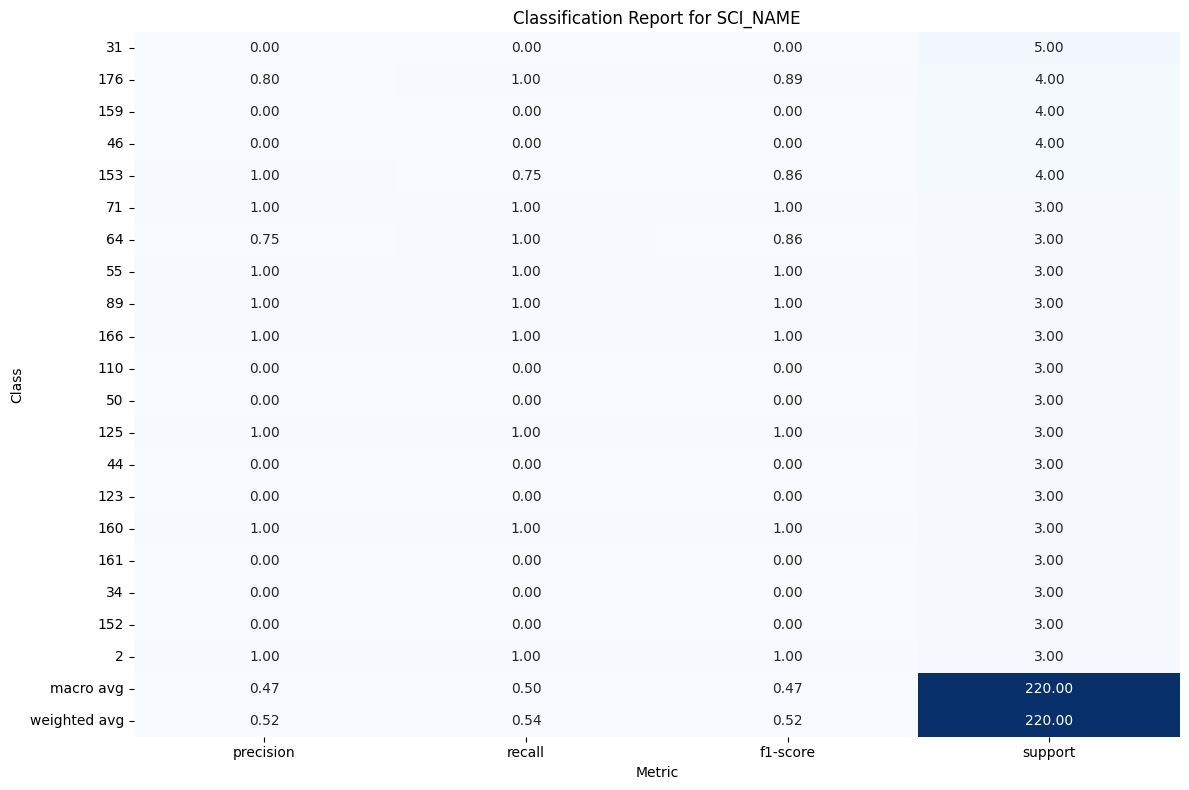


Sample predictions with top-5 candidates:

Sample #132
True class: N/A (Petrified wood)
Top 5 predictions:
  N/A (Petrified wood): 0.9996
  N/A (Crocodile): 0.0002
  Agathiceras aff. suessi: 0.0001
  N/A (Dinosaur): 0.0000
  N/A (Bryozoa): 0.0000

Sample #148
True class: cf. Kochoceras sp.
Top 5 predictions:
  cf. Kochoceras sp.: 0.6909
  Armenoceras sp.: 0.1804
  Orthis? sp.: 0.0838
  N/A (Burrow): 0.0191
  ?Modiolopsis sp.: 0.0148

Sample #93
True class: Halobia comata
Top 5 predictions:
  Halobia cf. comata: 0.7968
  Halobia comata: 0.1049
  Posidonia sp.: 0.0939
  N/A (Bivalve): 0.0018
  Isanemys srisuki: 0.0008

Sample #180
True class: Fenestella cf. F. triserialis
Top 5 predictions:
  Polypora cf. gracilis: 0.4922
  Fenestella cf. F. triserialis: 0.2268
  Fenestella spp.: 0.1895
  Polypora sp. indet.: 0.0728
  Dictyoclostus sp.: 0.0062

Sample #15
True class: cf. Rhipidomella sp.
Top 5 predictions:
  cf. Rhipidomella sp.: 0.4607
  cf. Reticulatia sp.A: 0.3843
  cf. Reticulatia s

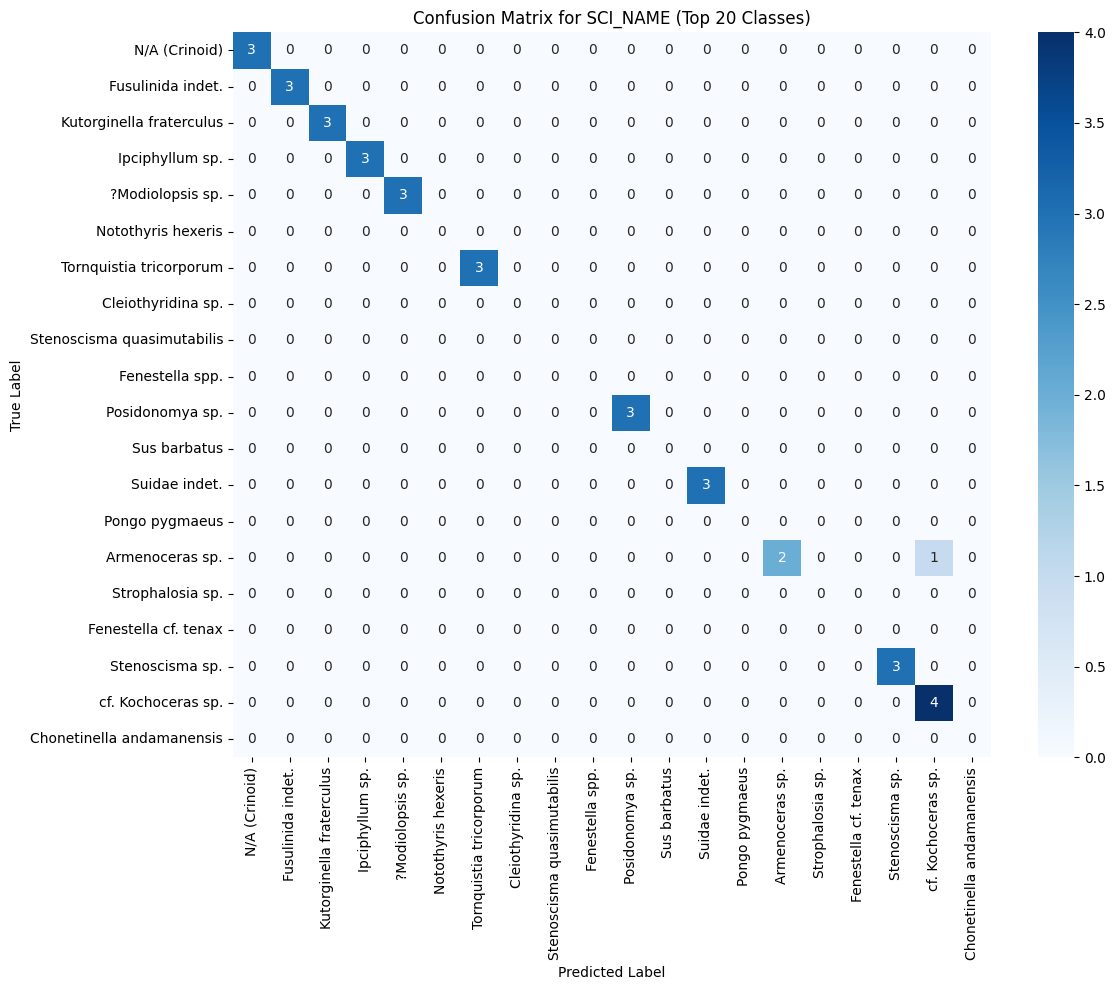

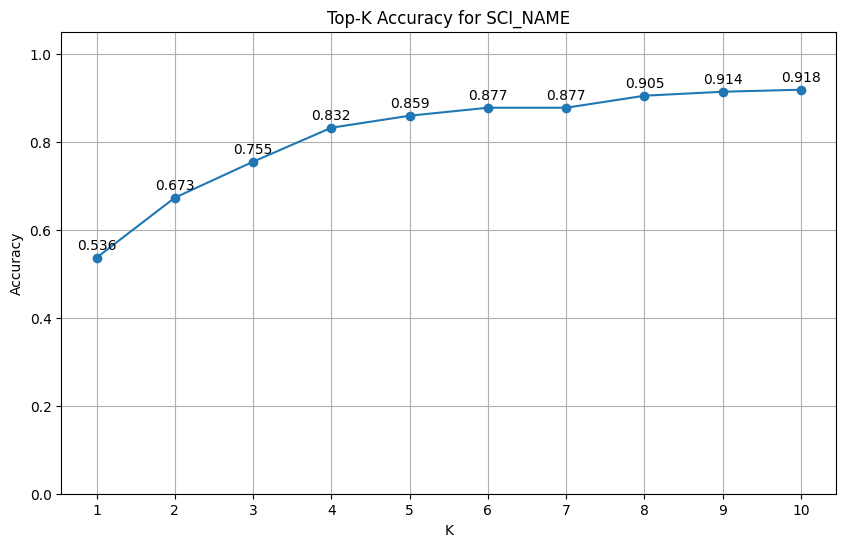


=== Evaluation for PERIODFROM ===
Accuracy: 0.9909
Top-3 Accuracy: 0.9955
Top-5 Accuracy: 0.9955


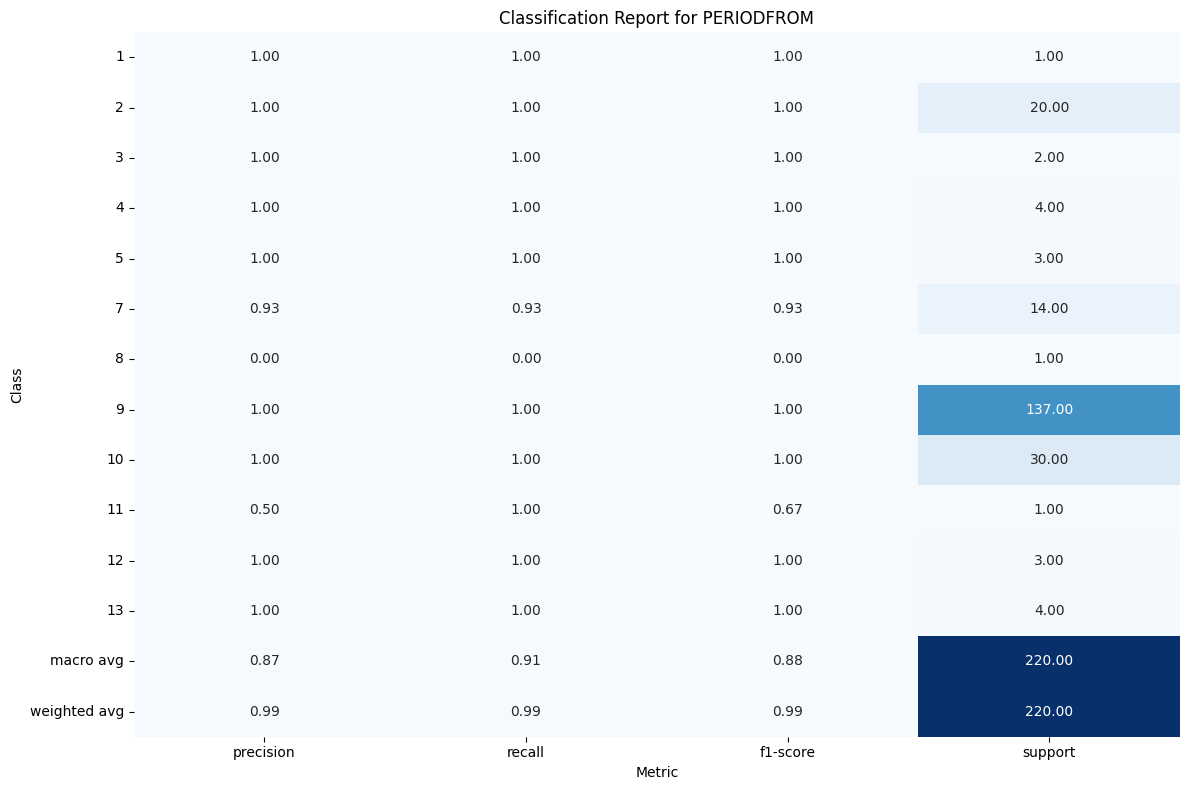


Sample predictions with top-5 candidates:

Sample #132
True class: เพอร์เมียน
Top 5 predictions:
  เพอร์เมียน: 0.9996
  ออร์โดวิเชียน: 0.0003
  ครีเทเชียสตอนต้น: 0.0000
  Other_rare_PERIODFROM: 0.0000
  ออร์โดวีเชียน-ไซลูเรียน: 0.0000

Sample #148
True class: ออร์โดวิเชียน
Top 5 predictions:
  ออร์โดวิเชียน: 1.0000
  จูแรสสิกตอนปลายถึงครีเทเชียสตอนต้น: 0.0000
  จูแรสซิก: 0.0000
  Other_rare_PERIODFROM: 0.0000
  จูแรสสิกตอนปลาย: 0.0000

Sample #93
True class: ไทรแอสสิก
Top 5 predictions:
  ไทรแอสสิก: 1.0000
  ครีเทเชียส: 0.0000
  จูแรสซิก: 0.0000
  ครีเทเซียสตอนต้น: 0.0000
  Other_rare_PERIODFROM: 0.0000

Sample #180
True class: เพอร์เมียน
Top 5 predictions:
  เพอร์เมียน: 0.9998
  ออร์โดวิเชียน: 0.0001
  ครีเทเชียส: 0.0000
  ครีเทเซียสตอนต้น: 0.0000
  ครีเทเชียสตอนต้น: 0.0000

Sample #15
True class: ครีเทเชียสตอนต้น
Top 5 predictions:
  ครีเทเชียสตอนต้น: 0.9989
  ไทรแอสสิกตอนปลาย: 0.0004
  จูแรสสิกตอนปลายถึงครีเทเชียสตอนต้น: 0.0003
  จูแรสซิก: 0.0001
  จูแรสสิกตอนปลาย: 0.0001


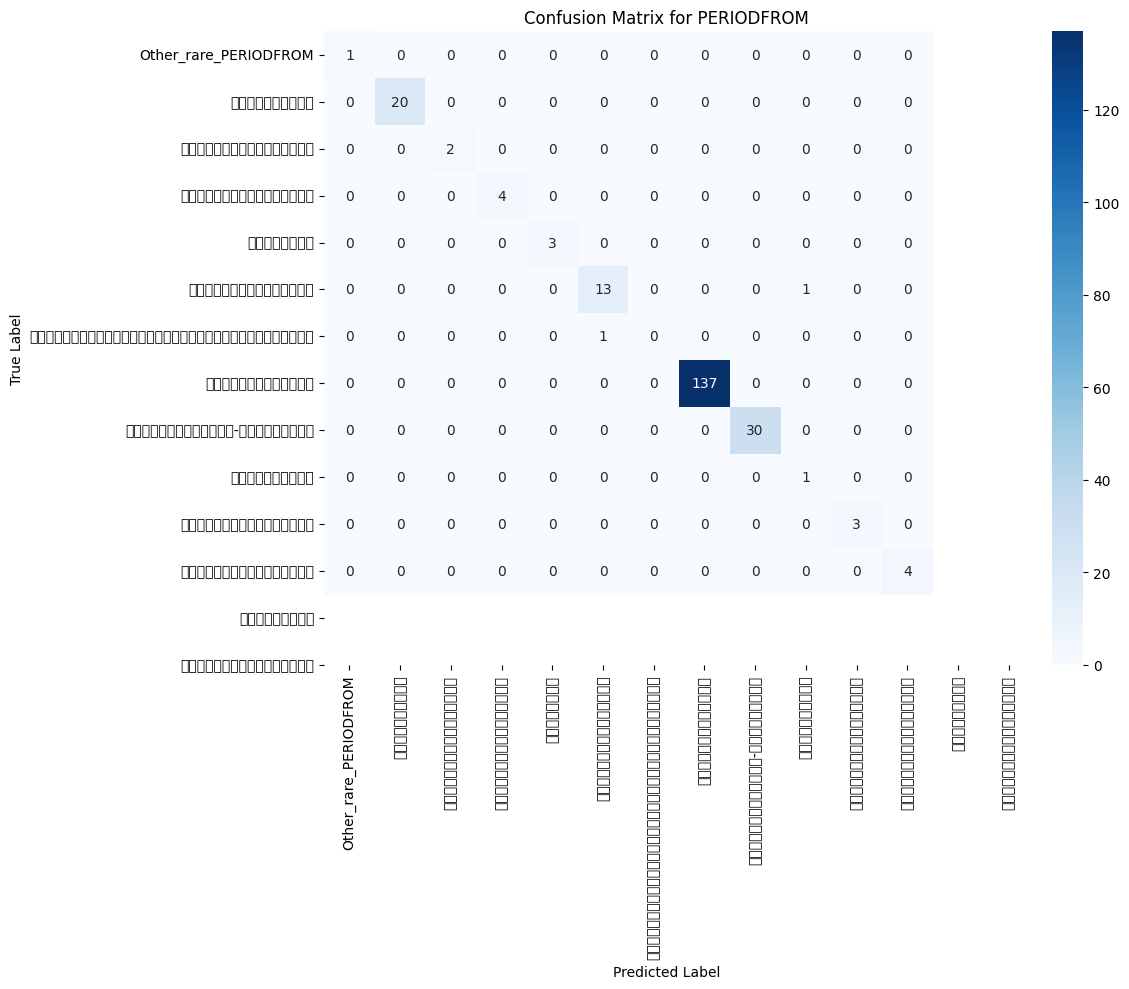

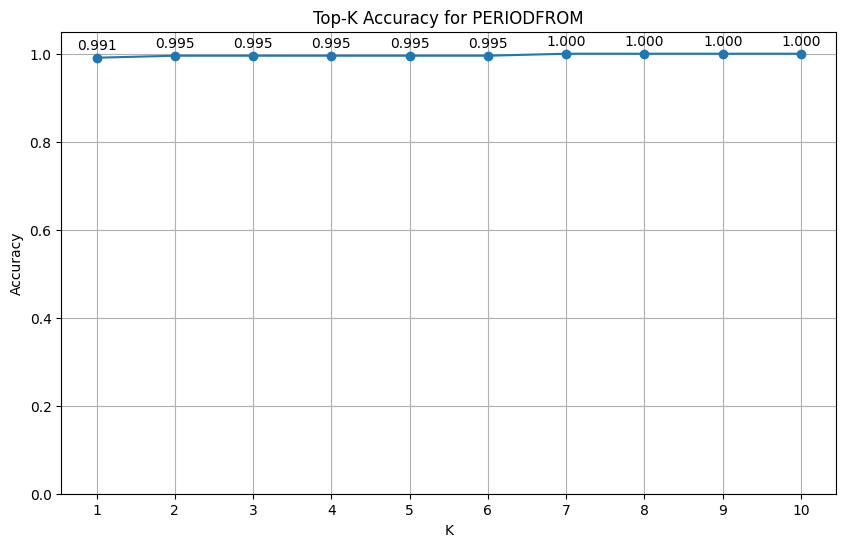


Step 9: Plotting training history...


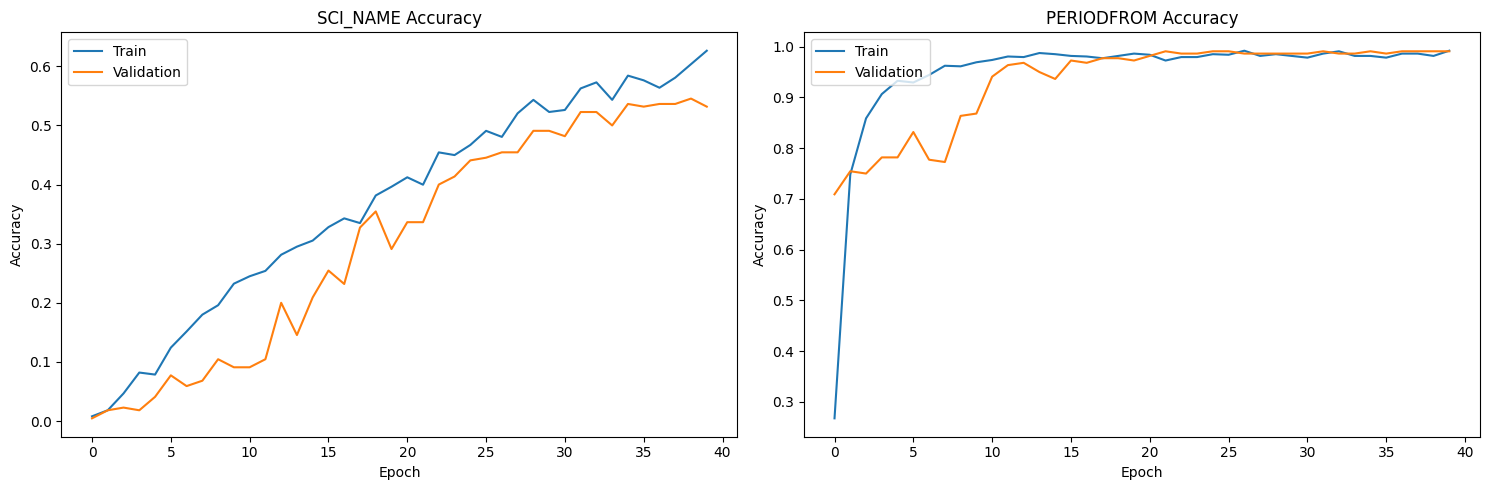

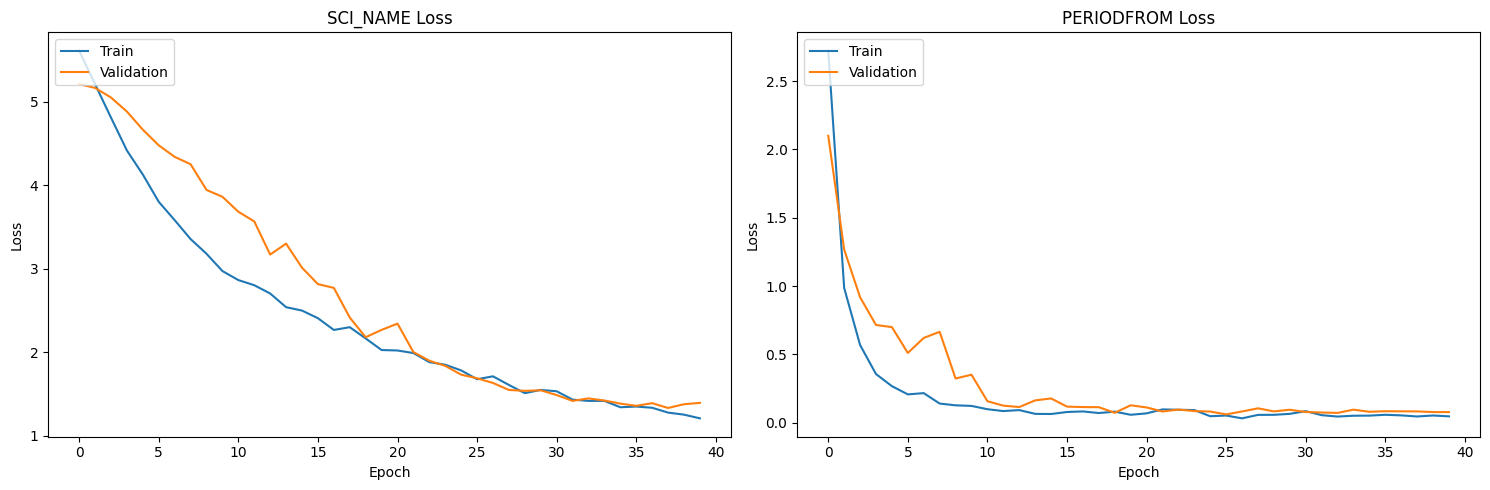

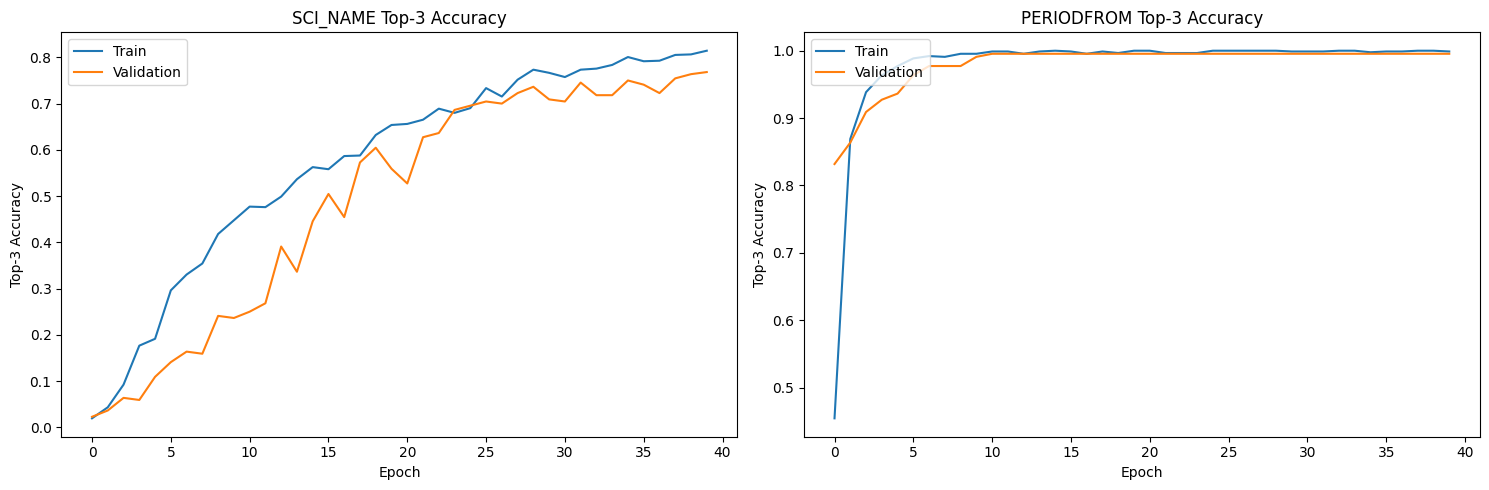

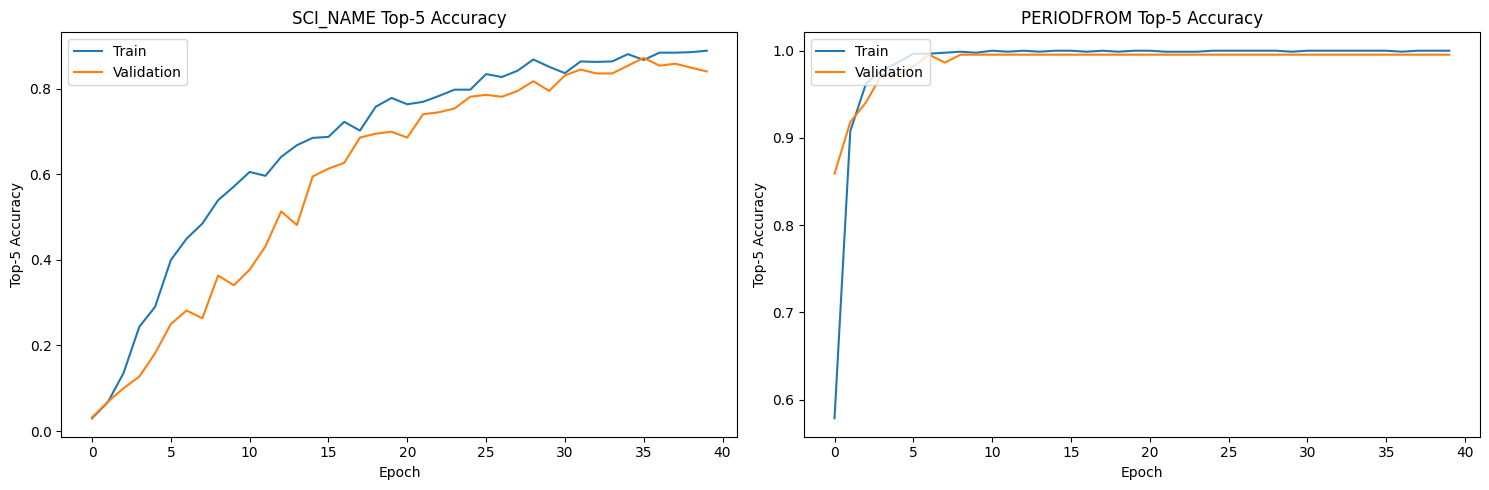


Step 10: Saving model and artifacts...
Model saved to /content/model/enhanced_fossil_model.h5
Model and preprocessing objects saved with prefix 'enhanced_fossil_model' to /content/model/

Pipeline completed in 0 hours, 10 minutes, and 47.61 seconds
Results saved to /content/model/ directory


In [6]:
# Cell 1: Import Required Libraries
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
import pickle

import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, backend as K
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Check TensorFlow and GPU availability
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

# Create directories for output
os.makedirs('/content/model', exist_ok=True)
os.makedirs('/content/model/satellite_maps', exist_ok=True)
os.makedirs('/content/model/satellite_data', exist_ok=True)
os.makedirs('/content/model/logs', exist_ok=True)

# Cell 2: Load Data and Adjust Image Paths
def load_data(filepath='fossil_features_full.csv'):
    """
    Load data and adjust image paths for Colab environment
    """
    df = pd.read_csv(filepath)
    print(f"Loaded data with shape: {df.shape}")

    # Adjust image paths for Colab environment
    if 'satellite_img_path' in df.columns:
        df['satellite_img_path_original'] = df['satellite_img_path']
        df['satellite_img_path'] = df['satellite_img_path'].apply(
            lambda x: x.replace('satellite_data', '/content/model/satellite_data') if isinstance(x, str) else x
        )

    if 'map_img_path' in df.columns:
        df['map_img_path_original'] = df['map_img_path']
        df['map_img_path'] = df['map_img_path'].apply(
            lambda x: x.replace('satellite_maps', '/content/model/satellite_maps') if isinstance(x, str) else x
        )

    if 'direct_satellite_img_path' in df.columns:
        df['direct_satellite_img_path_original'] = df['direct_satellite_img_path']
        df['direct_satellite_img_path'] = df['direct_satellite_img_path'].apply(
            lambda x: x.replace('satellite_data', '/content/model/satellite_data') if isinstance(x, str) else x
        )

    return df

# Cell 3: Enhanced Data Preprocessing with Both Upsampling and Downsampling
def enhanced_preprocess_data(df, min_samples_per_class=2, max_samples_per_class=500,
                            min_samples_after_balancing=10, target_samples=None):
    """
    Enhanced preprocessing with both downsampling of majority classes and upsampling of minority classes.

    Args:
        df: Input DataFrame
        min_samples_per_class: Minimum samples required for a class (otherwise merged to "Other")
        max_samples_per_class: Maximum samples to keep for majority classes (downsampling)
        min_samples_after_balancing: Minimum samples for minority classes after upsampling
        target_samples: Target number of samples per class (if None, uses adaptive balancing)

    Returns:
        Processed DataFrame, label encoders, and class weights
    """
    # Target variables
    targets = ['SCI_NAME', 'PERIODFROM']

    # Check for missing values in targets
    for target in targets:
        missing = df[target].isna().sum()
        print(f"Missing values in {target}: {missing}")
        if missing > 0:
            # Fill missing values with a placeholder
            df[target] = df[target].fillna("Unknown")

    # Create label encoders for targets and handle class imbalance
    label_encoders = {}
    class_weights = {}

    # Create a copy of the original dataframe to preserve it
    df_original = df.copy()

    for target in targets:
        print(f"\nProcessing {target}...")

        # Working with a copy of the dataframe for this target
        df_target = df_original.copy()

        # Count class frequencies
        class_counts = df_target[target].value_counts()
        print(f"Original class distribution: {len(class_counts)} unique classes")
        print(f"Most common classes: {class_counts.head(5).to_dict()}")
        print(f"Least common classes: {class_counts.tail(5).to_dict()}")

        # Identify rare classes (with fewer than min_samples_per_class)
        rare_classes = class_counts[class_counts < min_samples_per_class].index.tolist()
        print(f"Found {len(rare_classes)} rare classes with fewer than {min_samples_per_class} samples")

        # Replace rare classes with "Other"
        if rare_classes:
            df_target[f'{target}_original'] = df_target[target].copy()
            df_target.loc[df_target[target].isin(rare_classes), target] = f"Other_rare_{target}"
            print(f"Grouped {len(rare_classes)} rare classes into 'Other_rare_{target}'")

        # Get updated class counts after grouping rare classes
        class_counts = df_target[target].value_counts()

        # ====== ENHANCED BALANCING STRATEGY ======
        # Identify majority and minority classes
        majority_classes = class_counts[class_counts > max_samples_per_class].index.tolist()
        minority_classes = class_counts[class_counts < min_samples_after_balancing].index.tolist()

        # Determine target sample size if not specified
        if target_samples is None:
            # Adaptive approach: use median as target
            median_count = np.median(class_counts.values)
            target_samples = min(int(median_count), max_samples_per_class)

        print(f"Target samples per class: {target_samples}")
        print(f"Downsampling {len(majority_classes)} majority classes")
        print(f"Upsampling {len(minority_classes)} minority classes")

        # Create balanced dataframe
        balanced_dfs = []

        # Process each class
        for cls in class_counts.index:
            cls_df = df_target[df_target[target] == cls]
            n_samples = len(cls_df)

            if n_samples > target_samples:
                # Downsample
                downsampled = cls_df.sample(target_samples, random_state=42)
                balanced_dfs.append(downsampled)
            elif n_samples < min_samples_after_balancing:
                # Upsample minority class
                # For very small classes, use more aggressive upsampling
                multiplier = max(2, int(target_samples / n_samples))
                n_samples_up = min(target_samples, n_samples * multiplier)

                upsampled = resample(
                    cls_df,
                    replace=True,
                    n_samples=n_samples_up,
                    random_state=42
                )
                balanced_dfs.append(upsampled)
            else:
                # Keep as is - it's already in the desired range
                balanced_dfs.append(cls_df)

        # Combine all balanced datasets
        df_balanced = pd.concat(balanced_dfs).reset_index(drop=True)
        print(f"After balancing: {len(df_balanced)} total samples")

        # Show distribution after balancing
        new_class_counts = df_balanced[target].value_counts()
        print(f"Class distribution after balancing:")
        print(f"  Min samples: {new_class_counts.min()}")
        print(f"  Max samples: {new_class_counts.max()}")
        print(f"  Mean samples: {new_class_counts.mean():.1f}")
        print(f"  Median samples: {np.median(new_class_counts):.1f}")

        # Encode target classes
        le = LabelEncoder()
        df_balanced[f'{target}_encoded'] = le.fit_transform(df_balanced[target])
        label_encoders[target] = le

        # Calculate class weights for weighted loss
        # Use inverse frequency for better handling of imbalanced cases
        class_counts = df_balanced[target].value_counts()
        n_samples = len(df_balanced)
        n_classes = len(class_counts)

        # Create dictionary mapping class index to weight
        weights = {le.transform([cls])[0]: n_samples / (n_classes * count)
                  for cls, count in class_counts.items()}
        class_weights[target] = weights

        print(f"Final {target} class distribution: {len(le.classes_)} unique classes")

        # Update the working dataframe for this target
        if target == targets[0]:
            df = df_balanced.copy()
        else:
            # For second target, we keep the encoder but not the balanced data
            # This keeps the data balanced for the first (primary) target
            df[f'{target}_encoded'] = le.transform(df[target])

    return df, label_encoders, class_weights

# Cell 4: Feature Categorization
def categorize_features(df):
    """
    Categorize features into different types for model architecture
    """
    # Binary features (direct input)
    binary_features = [
        'has_กระดูก', 'has_ฟัน', 'has_ฟอสซิล', 'has_ปะการัง', 'has_เปลือก', 'has_แบรคิโอพอด',
        'has_real_satellite_data', 'has_bert_embeddings', 'pangaea_coords_approximated'
    ]

    # Numeric features (to be scaled)
    numeric_features = [
        'latitude', 'longitude', 'period_age_mya', 'pangaea_lat', 'pangaea_lon',
        'distance_from_centroid', 'nearest_related_site_km', 'ndvi', 'red_band',
        'green_band', 'blue_band', 'nir_band', 'elevation_simulated',
        'FOS_DES_TH_length', 'GEO_DES_TH_length', 'F_PART_length',
        'species_frequency', 'location_frequency', 'province_density',
        'period_frequency', 'group_frequency'
    ]

    # Categorical features (to be embedded)
    categorical_features = [
        'F_GROUP', 'F_TYPE', 'F_PART', 'PROVINCE_fossil', 'DISTRICT_fossil',
        'GEO_GROUP', 'FORMATION', 'FOS_GR_1', 'FOS_GR_2', 'FOS_GR_3',
        'geological_era'
    ]

    # Text features (for BERT processing)
    text_features = ['FOS_DES_TH', 'GEO_DES_TH']

    # Text embedding features (already processed by BERT)
    text_embedding_features = [col for col in df.columns if col.startswith('text_embedding_')]

    # Image features (paths to images)
    image_features = ['satellite_img_path', 'map_img_path', 'direct_satellite_img_path']

    # Filter out features that don't exist in the dataframe
    binary_features = [f for f in binary_features if f in df.columns]
    numeric_features = [f for f in numeric_features if f in df.columns]
    categorical_features = [f for f in categorical_features if f in df.columns]
    text_features = [f for f in text_features if f in df.columns]
    text_embedding_features = [f for f in text_embedding_features if f in df.columns]
    image_features = [f for f in image_features if f in df.columns]

    feature_groups = {
        'binary': binary_features,
        'numeric': numeric_features,
        'categorical': categorical_features,
        'text': text_features,
        'text_embeddings': text_embedding_features,
        'image': image_features
    }

    # Print feature counts
    for group, features in feature_groups.items():
        print(f"{group} features: {len(features)}")

    return feature_groups

# Cell 5: Prepare Data for Modeling with Real Images
def prepare_model_data(df, feature_groups, label_encoders):
    """
    Prepare data for modeling with real images when available
    """
    # Clean and prepare the data

    # Prepare binary features
    binary_data = df[feature_groups['binary']].fillna(0).astype(float).values

    # Prepare numeric features
    numeric_data = df[feature_groups['numeric']].fillna(0).astype(float)
    scaler = StandardScaler()
    numeric_data_scaled = scaler.fit_transform(numeric_data)

    # Prepare categorical features
    categorical_data = {}
    categorical_sizes = {}
    for feature in feature_groups['categorical']:
        # Fill missing values
        df[feature] = df[feature].fillna('Unknown')
        # Create integer encoding
        le = LabelEncoder()
        categorical_data[feature] = le.fit_transform(df[feature])
        categorical_sizes[feature] = len(le.classes_)

    # Use text embeddings (pre-processed BERT features)
    text_embeddings = df[feature_groups['text_embeddings']].fillna(0).values

    # For image data, load real images when possible
    image_data = None
    if feature_groups['image']:
        # Check if image files exist
        valid_images_found = False

        # Try to load images from the first path that works
        for img_col in feature_groups['image']:
            # Skip empty paths
            if df[img_col].isna().all():
                continue

            # Check a few rows to see if images exist
            for i in range(min(10, len(df))):
                if i >= len(df):
                    break

                img_path = df[img_col].iloc[i]
                if isinstance(img_path, str) and os.path.exists(img_path):
                    print(f"Found valid image at: {img_path}")
                    try:
                        with Image.open(img_path) as sample_img:
                            # Success! We can load an image
                            img_width, img_height = sample_img.size
                            valid_images_found = True
                            print(f"Image dimensions: {img_width}x{img_height}")
                            break
                    except Exception as e:
                        print(f"Error opening image {img_path}: {e}")

            if valid_images_found:
                break

        # First option: Try to use direct_satellite_img_path which should have clean images
        if 'direct_satellite_img_path' in feature_groups['image'] and valid_images_found:
            print("Loading images from direct_satellite_img_path...")
            image_data = []

            # Load all images or create placeholder for missing ones
            for idx, row in df.iterrows():
                try:
                    img_path = row['direct_satellite_img_path']
                    if os.path.exists(img_path):
                        # Load the image, resize to 300x300, convert to RGB if needed
                        with Image.open(img_path) as img:
                            img = img.resize((300, 300))
                            if img.mode != 'RGB':
                                img = img.convert('RGB')
                            img_array = np.array(img) / 255.0  # Normalize to 0-1
                            image_data.append(img_array)
                    else:
                        # Create a placeholder (gray image)
                        image_data.append(np.ones((300, 300, 3)) * 0.5)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
                    # Create a placeholder (gray image)
                    image_data.append(np.ones((300, 300, 3)) * 0.5)

                # Print progress
                if idx % 1000 == 0 and idx > 0:
                    print(f"Loaded {idx}/{len(df)} images...")

            # Convert to numpy array
            image_data = np.array(image_data)
            print(f"Loaded image data shape: {image_data.shape}")

        # If no real images found, use synthetic data
        if not valid_images_found or image_data is None:
            print("No valid images found. Using synthetic image data.")
            image_data = np.random.rand(len(df), 300, 300, 3)

    # Prepare targets
    targets = {}
    for target in label_encoders.keys():
        targets[target] = df[f'{target}_encoded'].values
        targets[f'{target}_categorical'] = to_categorical(targets[target])

    # Split data without stratification to avoid errors with rare classes
    X_train_idx, X_test_idx = train_test_split(
        np.arange(len(df)),
        test_size=0.2,
        random_state=42
    )

    train_data = {
        'binary': binary_data[X_train_idx],
        'numeric': numeric_data_scaled[X_train_idx],
        'categorical': {f: categorical_data[f][X_train_idx] for f in feature_groups['categorical']},
        'text_embeddings': text_embeddings[X_train_idx],
        'image': image_data[X_train_idx] if image_data is not None else None
    }

    test_data = {
        'binary': binary_data[X_test_idx],
        'numeric': numeric_data_scaled[X_test_idx],
        'categorical': {f: categorical_data[f][X_test_idx] for f in feature_groups['categorical']},
        'text_embeddings': text_embeddings[X_test_idx],
        'image': image_data[X_test_idx] if image_data is not None else None
    }

    train_targets = {target: targets[f'{target}_categorical'][X_train_idx] for target in label_encoders.keys()}
    test_targets = {target: targets[f'{target}_categorical'][X_test_idx] for target in label_encoders.keys()}

    # Analyze class distribution in train/test splits
    for target in label_encoders.keys():
        y_train = targets[target][X_train_idx]
        y_test = targets[target][X_test_idx]

        train_dist = Counter(y_train)
        test_dist = Counter(y_test)

        print(f"\n{target} train/test distribution:")
        print(f"  Train set: {len(train_dist)} unique classes, {len(y_train)} samples")
        print(f"  Test set: {len(test_dist)} unique classes, {len(y_test)} samples")

        # Check for classes in test but not in train
        missing_in_train = set(test_dist.keys()) - set(train_dist.keys())
        if missing_in_train:
            print(f"  Warning: {len(missing_in_train)} classes in test set not present in training set")

    return train_data, test_data, train_targets, test_targets, categorical_sizes, scaler

# Cell 6: Create Custom Loss for Class Weights
def create_weighted_categorical_crossentropy(class_weight_dict):
    """
    Create a weighted version of categorical crossentropy for handling class imbalance
    """
    # Convert class weight dict to tensor
    class_weights = np.array(list(class_weight_dict.values()))

    def weighted_categorical_crossentropy(y_true, y_pred):
        # Standard categorical crossentropy
        base_cce = K.categorical_crossentropy(y_true, y_pred)

        # Get the class indices
        class_indices = K.argmax(y_true, axis=-1)

        # Map indices to weights
        weights = K.gather(K.constant(class_weights), class_indices)

        # Apply weights to loss
        weighted_loss = base_cce * weights

        return K.mean(weighted_loss)

    return weighted_categorical_crossentropy

# Cell 7: Create Enhanced Model Architecture
def create_enhanced_model(train_data, feature_groups, categorical_sizes, num_classes):
    """
    Create an enhanced model with more capacity and better feature utilization
    for improved accuracy.
    """
    # Binary data input with normalization
    binary_input = Input(shape=(len(feature_groups['binary']),), name='binary_input')
    binary_normalized = BatchNormalization()(binary_input)

    # Numeric data input + enhanced processing
    numeric_input = Input(shape=(len(feature_groups['numeric']),), name='numeric_input')
    numeric_normalized = BatchNormalization()(numeric_input)

    # First branch - direct dense connection
    numeric_branch1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(numeric_normalized)
    numeric_branch1 = BatchNormalization()(numeric_branch1)
    numeric_branch1 = Dropout(0.3)(numeric_branch1)

    # Second branch - deeper network
    numeric_branch2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(numeric_normalized)
    numeric_branch2 = BatchNormalization()(numeric_branch2)
    numeric_branch2 = Dropout(0.3)(numeric_branch2)
    numeric_branch2 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(numeric_branch2)
    numeric_branch2 = BatchNormalization()(numeric_branch2)
    numeric_branch2 = Dropout(0.2)(numeric_branch2)

    # Combine numeric branches
    numeric_processed = concatenate([numeric_branch1, numeric_branch2], name='numeric_combined')

    # Categorical data inputs + improved embeddings
    categorical_inputs = []
    categorical_embeddings = []

    for feature in feature_groups['categorical']:
        vocab_size = categorical_sizes[feature] + 1  # +1 for unknown/padding
        # Larger embedding dimensions for more capacity
        embedding_dim = min(100, (vocab_size + 1) // 2)

        cat_input = Input(shape=(1,), name=f'{feature}_input')
        categorical_inputs.append(cat_input)

        embedding = Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=1,
            embeddings_regularizer=regularizers.l2(0.001),
            name=f'{feature}_embedding'
        )(cat_input)

        embedding_flat = Flatten(name=f'{feature}_flatten')(embedding)
        categorical_embeddings.append(embedding_flat)

    # Concatenate all categorical embeddings
    if categorical_embeddings:
        categorical_combined = concatenate(categorical_embeddings, name='categorical_concat')
        # Add a dense layer to reduce dimensionality of combined embeddings
        categorical_concat = Dense(256, activation='relu')(categorical_combined)
        categorical_concat = BatchNormalization()(categorical_concat)
        categorical_concat = Dropout(0.3)(categorical_concat)
    else:
        # Placeholder if no categorical features
        categorical_concat = Input(shape=(1,), name='categorical_placeholder')

    # Text embeddings (already processed by BERT) with enhanced processing
    text_embedding_input = Input(shape=(len(feature_groups['text_embeddings']),), name='text_embedding_input')
    text_embedding_norm = BatchNormalization()(text_embedding_input)

    # Process text embeddings through multiple dense layers
    text_processed = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001))(text_embedding_norm)
    text_processed = BatchNormalization()(text_processed)
    text_processed = Dropout(0.3)(text_processed)
    text_processed = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))(text_processed)
    text_processed = BatchNormalization()(text_processed)
    text_processed = Dropout(0.2)(text_processed)

    # Image processing path with improved CNN
    if train_data['image'] is not None:
        image_input = Input(shape=train_data['image'].shape[1:], name='image_input')

        # Improved CNN layers with residual connections
        # First block
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(image_input)
        x = BatchNormalization()(x)
        x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.2)(x)

        # Second block
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.3)(x)

        # Third block
        x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)
        x = Dropout(0.4)(x)

        # Global average pooling instead of flatten for better generalization
        image_features_avg = GlobalAveragePooling2D()(x)

        # Dense reduction
        image_features = Dense(128, activation='relu')(image_features_avg)
        image_features = BatchNormalization()(image_features)
        image_features = Dropout(0.3)(image_features)
    else:
        # Placeholder if no image data
        image_input = Input(shape=(1,), name='image_placeholder')
        image_features = Dense(128, activation='relu')(image_input)

    # Concatenate all features
    if train_data['image'] is not None and len(categorical_embeddings) > 0:
        concatenated = concatenate([
            binary_normalized,
            numeric_processed,
            categorical_concat,
            text_processed,
            image_features
        ], name='concatenated_layer')
    elif train_data['image'] is not None:
        concatenated = concatenate([
            binary_normalized,
            numeric_processed,
            text_processed,
            image_features
        ], name='concatenated_layer')
    elif len(categorical_embeddings) > 0:
        concatenated = concatenate([
            binary_normalized,
            numeric_processed,
            categorical_concat,
            text_processed
        ], name='concatenated_layer')
    else:
        concatenated = concatenate([
            binary_normalized,
            numeric_processed,
            text_processed
        ], name='concatenated_layer')

    # Enhanced dense layers with higher capacity
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_1024')(concatenated)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_512')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='dense_256')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Split into two paths with improved capacity
    sci_name_branch = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='sci_name_dense1')(x)
    sci_name_branch = BatchNormalization()(sci_name_branch)
    sci_name_branch = Dropout(0.3)(sci_name_branch)
    sci_name_branch = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='sci_name_dense2')(sci_name_branch)
    sci_name_branch = BatchNormalization()(sci_name_branch)
    sci_name_branch = Dropout(0.2)(sci_name_branch)
    sci_name_output = Dense(num_classes['SCI_NAME'], activation='softmax', name='sci_name_output')(sci_name_branch)

    period_branch = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='period_dense1')(x)
    period_branch = BatchNormalization()(period_branch)
    period_branch = Dropout(0.3)(period_branch)
    period_branch = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001), name='period_dense2')(period_branch)
    period_branch = BatchNormalization()(period_branch)
    period_branch = Dropout(0.2)(period_branch)
    period_output = Dense(num_classes['PERIODFROM'], activation='softmax', name='period_output')(period_branch)

    # Create model with all inputs and outputs
    inputs = [binary_input, numeric_input] + categorical_inputs + [text_embedding_input]
    if train_data['image'] is not None:
        inputs.append(image_input)

    model = models.Model(
        inputs=inputs,
        outputs=[sci_name_output, period_output],
        name='enhanced_fossil_model'
    )

    return model

# Cell 8: Create Training Callbacks
def prepare_training(model_name='enhanced_fossil_model'):
    """
    Prepare training callbacks for model monitoring and early stopping
    """
    # Create model directory
    os.makedirs('/content/model', exist_ok=True)

    # Create callbacks
    checkpoint = ModelCheckpoint(
        f'/content/model/{model_name}_best.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=0.00001,
        verbose=1
    )

    tensorboard = TensorBoard(
        log_dir=f'/content/model/logs/{model_name}',
        histogram_freq=1,
        update_freq='epoch'
    )

    callbacks = [checkpoint, early_stopping, reduce_lr, tensorboard]
    return callbacks

# Cell 9: Enhanced Training with Learning Rate Schedule - FIXED VERSION
def enhanced_train_model(model, train_data, train_targets, test_data, test_targets,
                         callbacks, class_weights, feature_groups, batch_size=32, epochs=50):
    """
    Enhanced training function with learning rate scheduling
    """
    # Create custom weighted losses
    sci_name_weighted_loss = create_weighted_categorical_crossentropy(class_weights['SCI_NAME'])
    period_weighted_loss = create_weighted_categorical_crossentropy(class_weights['PERIODFROM'])

    # Prepare inputs for training and validation
    train_inputs = [
        train_data['binary'],
        train_data['numeric']
    ]

    test_inputs = [
        test_data['binary'],
        test_data['numeric']
    ]

    # Add categorical inputs
    for feature in feature_groups['categorical']:
        train_inputs.append(train_data['categorical'][feature])
        test_inputs.append(test_data['categorical'][feature])

    # Add text embedding input
    train_inputs.append(train_data['text_embeddings'])
    test_inputs.append(test_data['text_embeddings'])

    # Add image input if available
    if train_data['image'] is not None:
        train_inputs.append(train_data['image'])
        test_inputs.append(test_data['image'])

    # Prepare outputs
    train_outputs = [
        train_targets['SCI_NAME'],
        train_targets['PERIODFROM']
    ]

    test_outputs = [
        test_targets['SCI_NAME'],
        test_targets['PERIODFROM']
    ]

    # Train with custom learning rate schedule
    initial_learning_rate = 0.001
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate,
        decay_steps=1000,
        decay_rate=0.9,
        staircase=True)

    # Use optimizer with learning rate schedule
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    # Compile model with custom weighted losses
    model.compile(
        optimizer=optimizer,
        loss={
            'sci_name_output': sci_name_weighted_loss,
            'period_output': period_weighted_loss
        },
        metrics={
            'sci_name_output': [
                'accuracy',
                tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy'),
                tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')
            ],
            'period_output': [
                'accuracy',
                tf.keras.metrics.TopKCategoricalAccuracy(k=3, name='top3_accuracy'),
                tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top5_accuracy')
            ]
        },
        loss_weights={
            'sci_name_output': 1.0,
            'period_output': 1.0
        }
    )

    # Train the model
    history = model.fit(
        train_inputs,
        train_outputs,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(test_inputs, test_outputs),
        callbacks=callbacks,
        verbose=1
    )

    return model, history, train_inputs, test_inputs, train_outputs, test_outputs

# Cell 10: Fixed Evaluation Function
def evaluate_model(model, test_data, test_targets, label_encoders, feature_groups, test_inputs=None, test_outputs=None):
    """
    Evaluate model with visual classification reports
    """
    # If test_inputs and test_outputs are not provided, prepare them
    if test_inputs is None or test_outputs is None:
        # Prepare test inputs
        test_inputs = [
            test_data['binary'],
            test_data['numeric']
        ]

        # Add categorical inputs
        for feature in feature_groups['categorical']:
            test_inputs.append(test_data['categorical'][feature])

        # Add text embedding input
        test_inputs.append(test_data['text_embeddings'])

        # Add image input if available
        if test_data['image'] is not None:
            test_inputs.append(test_data['image'])

        # Prepare test outputs
        test_outputs = [
            test_targets['SCI_NAME'],
            test_targets['PERIODFROM']
        ]

    # Make predictions
    predictions = model.predict(test_inputs)

    # Evaluate for each target
    targets = ['SCI_NAME', 'PERIODFROM']
    results = {}

    for i, target in enumerate(targets):
        print(f"\n=== Evaluation for {target} ===")

        # Get predictions and true values
        y_pred_prob = predictions[i]
        y_true_cat = test_outputs[i] if isinstance(test_outputs, list) else test_targets[target]

        # Convert to class indices
        y_pred = np.argmax(y_pred_prob, axis=1)
        y_true = np.argmax(y_true_cat, axis=1)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_true)
        print(f"Accuracy: {accuracy:.4f}")
        results[f'{target}_accuracy'] = accuracy

        # Manual calculation of top-k accuracy
        for k in [3, 5]:
            # Get top-k predictions for each sample
            top_k_preds = np.argsort(y_pred_prob, axis=1)[:, -k:]

            # Check if true label is in top-k predictions for each sample
            correct = 0
            for j in range(len(y_true)):
                if y_true[j] in top_k_preds[j]:
                    correct += 1

            # Calculate accuracy
            top_k_acc = correct / len(y_true)
            print(f"Top-{k} Accuracy: {top_k_acc:.4f}")
            results[f'{target}_top{k}_accuracy'] = top_k_acc

        # Map indices back to original class names
        class_names = label_encoders[target].classes_
        y_pred_labels = [class_names[idx] for idx in y_pred]
        y_true_labels = [class_names[idx] for idx in y_true]

        # ========== VISUAL CLASSIFICATION REPORT ==========
        # Generate the classification report text
        report = classification_report(y_true, y_pred, output_dict=True)

        # Convert to dataframe for visualization
        report_df = pd.DataFrame(report).transpose()

        # Remove unnecessary columns and rows
        if 'accuracy' in report_df.index:
            report_df = report_df.drop('accuracy')

        # Keep only important metrics
        plot_cols = ['precision', 'recall', 'f1-score', 'support']

        # Limit to top 20 classes by support for readability
        if len(report_df) > 21:  # 20 classes + 'macro avg', 'weighted avg'
            # Extract avg rows
            avg_rows = report_df.loc[['macro avg', 'weighted avg']]
            class_rows = report_df.drop(['macro avg', 'weighted avg'])

            # Sort by support and take top 20
            top_classes = class_rows.sort_values('support', ascending=False).head(20)

            # Recombine
            report_df = pd.concat([top_classes, avg_rows])

            print(f"Note: Showing classification metrics for top 20 out of {len(class_names)} classes")

        # Create visual representation
        plt.figure(figsize=(12, max(8, len(report_df) * 0.3)))
        sns.heatmap(report_df[plot_cols].astype(float), annot=True, cmap='Blues', fmt='.2f', cbar=False)
        plt.title(f'Classification Report for {target}')
        plt.ylabel('Class')
        plt.xlabel('Metric')
        plt.tight_layout()
        plt.savefig(f'/content/model/{target}_classification_report.png')
        plt.show()

        # ========== SAMPLE PREDICTIONS ANALYSIS ==========
        # Analyze top-k predictions for random samples
        print("\nSample predictions with top-5 candidates:")
        np.random.seed(42)
        sample_indices = np.random.choice(len(y_true), min(5, len(y_true)), replace=False)

        for idx in sample_indices:
            true_class = class_names[y_true[idx]]

            # Get top 5 predictions
            top_k_indices = np.argsort(y_pred_prob[idx])[::-1][:5]
            top_k_classes = [class_names[i] for i in top_k_indices]
            top_k_probs = [y_pred_prob[idx][i] for i in top_k_indices]

            print(f"\nSample #{idx}")
            print(f"True class: {true_class}")
            print("Top 5 predictions:")
            for cls, prob in zip(top_k_classes, top_k_probs):
                print(f"  {cls}: {prob:.4f}")

        # ========== CONFUSION MATRIX WITH SAMPLE CONSISTENCY FIX ==========
        # Only create confusion matrix if there are enough classes
        if len(class_names) > 1:
            plt.figure(figsize=(12, 10))

            # Limit to top 20 classes by frequency for visualization
            class_counts = np.bincount(y_true)

            # Get indices of top 20 classes by frequency
            if len(class_counts) > 20:
                top_classes = np.argsort(class_counts)[-20:]

                # Create masks for rows and columns - with CONSISTENCY FIX
                # Only filter if both indices exist in the datasets
                mask_true = np.array([idx in top_classes for idx in y_true])

                # Combined mask to ensure consistent sample sizes
                combined_mask = mask_true

                # Filter true and pred using the same mask for consistency
                filtered_y_true = y_true[combined_mask]
                filtered_y_pred = y_pred[combined_mask]

                # Verify they have same length
                assert len(filtered_y_true) == len(filtered_y_pred), "Filtered arrays must have same length"

                # Only proceed if we have data
                if len(filtered_y_true) > 0:
                    # Create confusion matrix with filtered data
                    cm = confusion_matrix(
                        filtered_y_true,
                        filtered_y_pred,
                        labels=top_classes
                    )

                    # Get class names for the top classes
                    top_class_names = [class_names[i] for i in top_classes]

                    # Plot the confusion matrix
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                                xticklabels=top_class_names, yticklabels=top_class_names)
                    plt.title(f'Confusion Matrix for {target} (Top 20 Classes)')
                    plt.ylabel('True Label')
                    plt.xlabel('Predicted Label')
                    plt.xticks(rotation=90)
                    plt.yticks(rotation=0)
                    plt.tight_layout()
                    plt.savefig(f'/content/model/{target}_confusion_matrix.png')
                    plt.show()
                else:
                    print("Not enough overlapping classes for confusion matrix")
            else:
                # If fewer than 20 classes, use all
                cm = confusion_matrix(y_true, y_pred)
                sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                            xticklabels=class_names, yticklabels=class_names)
                plt.title(f'Confusion Matrix for {target}')
                plt.ylabel('True Label')
                plt.xlabel('Predicted Label')
                plt.tight_layout()
                plt.savefig(f'/content/model/{target}_confusion_matrix.png')
                plt.show()

        # ========== TOP-K ACCURACY VISUALIZATION ==========
        plt.figure(figsize=(10, 6))
        k_values = list(range(1, 11))  # k from 1 to 10
        top_k_accuracies = []

        for k in k_values:
            # Manual calculation of top-k accuracy
            top_k_preds = np.argsort(y_pred_prob, axis=1)[:, -k:]
            correct = sum(y_true[j] in top_k_preds[j] for j in range(len(y_true)))
            top_k_acc = correct / len(y_true)
            top_k_accuracies.append(top_k_acc)

        plt.plot(k_values, top_k_accuracies, marker='o', linestyle='-')
        plt.title(f'Top-K Accuracy for {target}')
        plt.xlabel('K')
        plt.ylabel('Accuracy')
        plt.grid(True)
        plt.xticks(k_values)
        plt.ylim(0, 1.05)

        for i, acc in enumerate(top_k_accuracies):
            plt.text(k_values[i], acc + 0.02, f'{acc:.3f}', ha='center')

        plt.savefig(f'/content/model/{target}_top_k_accuracy.png')
        plt.show()

    return results

# Cell 11: Plot Training History
def plot_history(history):
    """
    Plot training metrics history including accuracy, loss, and top-k metrics
    """
    # Plot training & validation accuracy
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['sci_name_output_accuracy'])
    plt.plot(history.history['val_sci_name_output_accuracy'])
    plt.title('SCI_NAME Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['period_output_accuracy'])
    plt.plot(history.history['val_period_output_accuracy'])
    plt.title('PERIODFROM Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('/content/model/training_accuracy.png')
    plt.show()

    # Plot training & validation loss
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['sci_name_output_loss'])
    plt.plot(history.history['val_sci_name_output_loss'])
    plt.title('SCI_NAME Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['period_output_loss'])
    plt.plot(history.history['val_period_output_loss'])
    plt.title('PERIODFROM Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('/content/model/training_loss.png')
    plt.show()

    # Plot Top-3 accuracy
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['sci_name_output_top3_accuracy'])
    plt.plot(history.history['val_sci_name_output_top3_accuracy'])
    plt.title('SCI_NAME Top-3 Accuracy')
    plt.ylabel('Top-3 Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['period_output_top3_accuracy'])
    plt.plot(history.history['val_period_output_top3_accuracy'])
    plt.title('PERIODFROM Top-3 Accuracy')
    plt.ylabel('Top-3 Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('/content/model/top3_accuracy.png')
    plt.show()

    # Plot Top-5 accuracy
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['sci_name_output_top5_accuracy'])
    plt.plot(history.history['val_sci_name_output_top5_accuracy'])
    plt.title('SCI_NAME Top-5 Accuracy')
    plt.ylabel('Top-5 Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['period_output_top5_accuracy'])
    plt.plot(history.history['val_period_output_top5_accuracy'])
    plt.title('PERIODFROM Top-5 Accuracy')
    plt.ylabel('Top-5 Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.savefig('/content/model/top5_accuracy.png')
    plt.show()

# Cell 12: Save Model and Artifacts
def save_results(model, label_encoders, scaler, feature_groups, class_weights, model_name='enhanced_fossil_model'):
    """
    Save model and all preprocessing objects
    """
    # Save model
    model.save(f'/content/model/{model_name}.h5')
    print(f"Model saved to /content/model/{model_name}.h5")

    # Save label encoders
    with open(f'/content/model/{model_name}_label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)

    # Save scaler
    with open(f'/content/model/{model_name}_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # Save feature groups
    with open(f'/content/model/{model_name}_feature_groups.pkl', 'wb') as f:
        pickle.dump(feature_groups, f)

    # Save class weights
    with open(f'/content/model/{model_name}_class_weights.pkl', 'wb') as f:
        pickle.dump(class_weights, f)

    print(f"Model and preprocessing objects saved with prefix '{model_name}' to /content/model/")

# Cell 13: Make Predictions on New Data
def predict_new_sample(input_data, model, label_encoders, scaler, feature_groups, top_k=5):
    """
    Make predictions for a new sample with top-k results.

    Args:
        input_data: Dictionary or DataFrame containing feature values
        model: Trained model
        label_encoders: Dictionary of label encoders for each target
        scaler: Fitted StandardScaler
        feature_groups: Dictionary of feature groups
        top_k: Number of top predictions to return

    Returns:
        Dictionary of predictions for each target with top-k results
    """
    # Convert input to DataFrame if it's a dictionary
    if isinstance(input_data, dict):
        input_data = pd.DataFrame([input_data])

    # Fix image paths if needed
    if 'satellite_img_path' in input_data.columns and not input_data['satellite_img_path'].iloc[0].startswith('/content'):
        input_data['satellite_img_path'] = input_data['satellite_img_path'].apply(
            lambda x: x.replace('satellite_data', '/content/model/satellite_data') if isinstance(x, str) else x
        )

    if 'map_img_path' in input_data.columns and not input_data['map_img_path'].iloc[0].startswith('/content'):
        input_data['map_img_path'] = input_data['map_img_path'].apply(
            lambda x: x.replace('satellite_maps', '/content/model/satellite_maps') if isinstance(x, str) else x
        )

    if 'direct_satellite_img_path' in input_data.columns and not input_data['direct_satellite_img_path'].iloc[0].startswith('/content'):
        input_data['direct_satellite_img_path'] = input_data['direct_satellite_img_path'].apply(
            lambda x: x.replace('satellite_data', '/content/model/satellite_data') if isinstance(x, str) else x
        )

    # Prepare binary features
    binary_input = input_data[feature_groups['binary']].fillna(0).astype(float).values

    # Prepare numeric features
    numeric_input = input_data[feature_groups['numeric']].fillna(0).astype(float)
    numeric_input_scaled = scaler.transform(numeric_input)

    # Prepare categorical features
    categorical_inputs = []
    for feature in feature_groups['categorical']:
        # Fill missing values
        input_data[feature] = input_data[feature].fillna('Unknown')

        # Get the original encoder
        le = label_encoders.get(feature)

        # If we don't have a specific encoder for this feature, create a dummy one
        if le is None:
            # Create a dummy encoding (just map everything to 0)
            categorical_input = np.zeros(len(input_data))
        else:
            # Try to transform using existing categories
            try:
                categorical_input = le.transform(input_data[feature])
            except:
                # If category not in training data, map to 'unknown' (0)
                categorical_input = np.zeros(len(input_data))

        categorical_inputs.append(categorical_input)

    # Prepare text embeddings
    text_embeddings = input_data[feature_groups['text_embeddings']].fillna(0).values

    # Prepare inputs for prediction
    model_inputs = [binary_input, numeric_input_scaled] + categorical_inputs + [text_embeddings]

    # Add image input if needed
    if 'image' in feature_groups and feature_groups['image']:
        # Try to load the real image
        image_loaded = False
        image_input = np.zeros((len(input_data), 300, 300, 3))

        if 'direct_satellite_img_path' in input_data.columns:
            img_path = input_data['direct_satellite_img_path'].iloc[0]
            if isinstance(img_path, str) and os.path.exists(img_path):
                try:
                    with Image.open(img_path) as img:
                        img = img.resize((300, 300))
                        if img.mode != 'RGB':
                            img = img.convert('RGB')
                        image_input[0] = np.array(img) / 255.0
                        image_loaded = True
                        print(f"Loaded image from {img_path}")
                except Exception as e:
                    print(f"Error loading image: {e}")

        # Use placeholder image if loading fails
        if not image_loaded:
            print("Using placeholder image")
            image_input = np.ones((len(input_data), 300, 300, 3)) * 0.5

        model_inputs.append(image_input)

    # Make predictions
    predictions = model.predict(model_inputs)

    # Process predictions
    targets = list(label_encoders.keys())
    results = {}

    for i, target in enumerate(targets):
        # Get class names
        class_names = label_encoders[target].classes_

        # Get top-k predictions
        top_k_indices = np.argsort(predictions[i][0])[::-1][:top_k]
        top_k_class_names = [class_names[idx] for idx in top_k_indices]
        top_k_confidences = [float(predictions[i][0][idx]) for idx in top_k_indices]

        # Store results
        results[target] = {
            'top_prediction': top_k_class_names[0],
            'top_confidence': top_k_confidences[0],
            'top_k_predictions': [
                {'class': cls, 'confidence': conf}
                for cls, conf in zip(top_k_class_names, top_k_confidences)
            ]
        }

    return results

# Cell 14: Main Training Pipeline - FIXED
def run_training_pipeline():
    """
    Run the complete training pipeline
    """
    start_time = time.time()
    print("Starting fossil classification training pipeline...")

    # Step 1: Load data
    print("\nStep 1: Loading data...")
    df = load_data()

    # Step 2: Enhanced preprocessing with balancing
    print("\nStep 2: Preprocessing data with balancing...")
    balanced_df, label_encoders, class_weights = enhanced_preprocess_data(
        df,
        min_samples_per_class=2,
        max_samples_per_class=300,
        min_samples_after_balancing=10
    )

    # Step 3: Categorize features
    print("\nStep 3: Categorizing features...")
    feature_groups = categorize_features(balanced_df)

    # Step 4: Prepare model data
    print("\nStep 4: Preparing model data...")
    train_data, test_data, train_targets, test_targets, categorical_sizes, scaler = prepare_model_data(
        balanced_df, feature_groups, label_encoders)

    # Step 5: Create enhanced model
    print("\nStep 5: Creating enhanced model...")
    num_classes = {
        'SCI_NAME': len(label_encoders['SCI_NAME'].classes_),
        'PERIODFROM': len(label_encoders['PERIODFROM'].classes_)
    }
    model = create_enhanced_model(train_data, feature_groups, categorical_sizes, num_classes)
    model.summary()

    # Save model architecture visualization if possible
    try:
        from tensorflow.keras.utils import plot_model
        plot_model(model, to_file='/content/model/model_architecture.png', show_shapes=True, show_dtype=True)
        print("Model architecture visualization saved to '/content/model/model_architecture.png'")
    except:
        print("Could not generate model architecture visualization")

    # Step 6: Prepare training callbacks
    print("\nStep 6: Preparing training callbacks...")
    callbacks = prepare_training()

    # Step 7: Train the model - PASS FEATURE_GROUPS
    print("\nStep 7: Training model...")
    model, history, train_inputs, test_inputs, train_outputs, test_outputs = enhanced_train_model(
        model, train_data, train_targets, test_data, test_targets,
        callbacks, class_weights, feature_groups, batch_size=32, epochs=40)

    # Step 8: Evaluate the model - PASS FEATURE_GROUPS
    print("\nStep 8: Evaluating model...")
    evaluation_results = evaluate_model(model, test_data, test_targets, label_encoders,
                                       feature_groups, test_inputs, test_outputs)

    # Step 9: Plot training history
    print("\nStep 9: Plotting training history...")
    plot_history(history)

    # Step 10: Save results
    print("\nStep 10: Saving model and artifacts...")
    save_results(model, label_encoders, scaler, feature_groups, class_weights)

    # Calculate total time
    total_time = time.time() - start_time
    hours, remainder = divmod(total_time, 3600)
    minutes, seconds = divmod(remainder, 60)
    print(f"\nPipeline completed in {int(hours)} hours, {int(minutes)} minutes, and {seconds:.2f} seconds")
    print(f"Results saved to /content/model/ directory")

    return model, history, evaluation_results, label_encoders, scaler, feature_groups, class_weights, test_data, test_targets

# Cell 15: Execute the pipeline
# Uncomment the line below to run the full pipeline
model, history, evaluation_results, label_encoders, scaler, feature_groups, class_weights, test_data, test_targets = run_training_pipeline()

## Feature Importance

In [7]:
# Cell: Permutation Importance for Both Outputs
def compute_permutation_importance_multi_target(model, test_data, test_targets, feature_groups, n_repeats=5):
    """
    Compute permutation importance for all input groups for both outputs (SCI_NAME and PERIODFROM).
    This function computes the drop in accuracy separately for each target.

    Args:
        model: Trained Keras model.
        test_data: Dictionary containing test inputs.
        test_targets: Dictionary containing test targets (one-hot encoded) for both outputs.
        feature_groups: Dictionary of feature groups.
        n_repeats: Number of repeats for permutation.

    Returns:
        Two pandas DataFrames: one for SCI_NAME and one for PERIODFROM.
    """
    import copy

    # Build test input list in same order as training.
    test_inputs = []
    test_inputs.append(test_data['binary'])
    test_inputs.append(test_data['numeric'])

    categorical_features = feature_groups.get('categorical', [])
    categorical_indices = {}
    for feature in categorical_features:
        categorical_indices[feature] = len(test_inputs)
        test_inputs.append(test_data['categorical'][feature])

    test_inputs.append(test_data['text_embeddings'])

    image_idx = None
    if feature_groups.get('image') and test_data.get('image') is not None:
        image_idx = len(test_inputs)
        test_inputs.append(test_data['image'])

    # Compute baseline accuracies for both outputs.
    predictions = model.predict(test_inputs, verbose=0)
    y_true_0 = np.argmax(test_targets['SCI_NAME'], axis=1)
    baseline_acc_0 = np.mean(np.argmax(predictions[0], axis=1) == y_true_0)
    y_true_1 = np.argmax(test_targets['PERIODFROM'], axis=1)
    baseline_acc_1 = np.mean(np.argmax(predictions[1], axis=1) == y_true_1)

    print(f"Baseline SCI_NAME Accuracy: {baseline_acc_0:.4f}")
    print(f"Baseline PERIODFROM Accuracy: {baseline_acc_1:.4f}")

    # Helper function: Evaluate accuracy for a given output index.
    def evaluate_inputs(modified_inputs, output_index, y_true):
        preds = model.predict(modified_inputs, verbose=0)
        y_pred_mod = np.argmax(preds[output_index], axis=1)
        return np.mean(y_pred_mod == y_true)

    importance_results_0 = []  # For SCI_NAME
    importance_results_1 = []  # For PERIODFROM

    # A function to process a given input group:
    def process_permutation(group_idx, feature_name, baseline_acc, y_true, group_label):
        accs = []
        for _ in range(n_repeats):
            mod_inputs = copy.deepcopy(test_inputs)
            if group_idx is not None:
                # For multi-column inputs (binary or numeric)
                permuted = mod_inputs[group_idx].copy()
                # For single-column (e.g., text embeddings or image), shuffling the whole array
                if len(permuted.shape) > 1 and permuted.shape[1] > 1:
                    # Assume shuffling column-wise if multi-dimensional feature
                    # Here, if it's a multi-column feature, we assume feature_name maps to one column.
                    # Otherwise, for one-dimensional inputs, we shuffle the whole vector.
                    # This code assumes binary and numeric have multiple columns.
                    col_index = feature_name[1]  # Pass a tuple like ('binary', j) for columns.
                    np.random.shuffle(permuted[:, col_index])
                else:
                    np.random.shuffle(permuted)
                mod_inputs[group_idx] = permuted
            else:
                # For inputs added as a single entity (e.g., text embeddings or image)
                mod_inputs[-1] = np.random.permutation(mod_inputs[-1])
            return evaluate_inputs(mod_inputs, output_index, y_true)

    # Process binary features
    binary_data = test_data['binary']
    binary_feature_names = feature_groups.get('binary', [])
    for j in range(binary_data.shape[1]):
        fname = binary_feature_names[j] if j < len(binary_feature_names) else f'binary_col_{j}'
        accs_0 = []
        accs_1 = []
        for _ in range(n_repeats):
            mod_inputs = copy.deepcopy(test_inputs)
            permuted = mod_inputs[0].copy()
            np.random.shuffle(permuted[:, j])
            mod_inputs[0] = permuted
            accs_0.append(evaluate_inputs(mod_inputs, 0, y_true_0))
            accs_1.append(evaluate_inputs(mod_inputs, 1, y_true_1))
        avg_acc_0 = np.mean(accs_0)
        avg_acc_1 = np.mean(accs_1)
        importance_results_0.append({
            'feature_group': 'binary',
            'feature': fname,
            'accuracy_drop': baseline_acc_0 - avg_acc_0
        })
        importance_results_1.append({
            'feature_group': 'binary',
            'feature': fname,
            'accuracy_drop': baseline_acc_1 - avg_acc_1
        })
        print(f"Binary feature '{fname}': ΔAcc SCI_NAME = {baseline_acc_0 - avg_acc_0:.4f}, PERIODFROM = {baseline_acc_1 - avg_acc_1:.4f}")

    # Process numeric features
    numeric_data = test_data['numeric']
    numeric_feature_names = feature_groups.get('numeric', [])
    for j in range(numeric_data.shape[1]):
        fname = numeric_feature_names[j] if j < len(numeric_feature_names) else f'numeric_col_{j}'
        accs_0 = []
        accs_1 = []
        for _ in range(n_repeats):
            mod_inputs = copy.deepcopy(test_inputs)
            permuted = mod_inputs[1].copy()
            np.random.shuffle(permuted[:, j])
            mod_inputs[1] = permuted
            accs_0.append(evaluate_inputs(mod_inputs, 0, y_true_0))
            accs_1.append(evaluate_inputs(mod_inputs, 1, y_true_1))
        avg_acc_0 = np.mean(accs_0)
        avg_acc_1 = np.mean(accs_1)
        importance_results_0.append({
            'feature_group': 'numeric',
            'feature': fname,
            'accuracy_drop': baseline_acc_0 - avg_acc_0
        })
        importance_results_1.append({
            'feature_group': 'numeric',
            'feature': fname,
            'accuracy_drop': baseline_acc_1 - avg_acc_1
        })
        print(f"Numeric feature '{fname}': ΔAcc SCI_NAME = {baseline_acc_0 - avg_acc_0:.4f}, PERIODFROM = {baseline_acc_1 - avg_acc_1:.4f}")

    # Process categorical features
    for feature in categorical_features:
        idx = categorical_indices[feature]
        accs_0 = []
        accs_1 = []
        for _ in range(n_repeats):
            mod_inputs = copy.deepcopy(test_inputs)
            permuted = mod_inputs[idx].copy()
            np.random.shuffle(permuted)
            mod_inputs[idx] = permuted
            accs_0.append(evaluate_inputs(mod_inputs, 0, y_true_0))
            accs_1.append(evaluate_inputs(mod_inputs, 1, y_true_1))
        avg_acc_0 = np.mean(accs_0)
        avg_acc_1 = np.mean(accs_1)
        importance_results_0.append({
            'feature_group': 'categorical',
            'feature': feature,
            'accuracy_drop': baseline_acc_0 - avg_acc_0
        })
        importance_results_1.append({
            'feature_group': 'categorical',
            'feature': feature,
            'accuracy_drop': baseline_acc_1 - avg_acc_1
        })
        print(f"Categorical feature '{feature}': ΔAcc SCI_NAME = {baseline_acc_0 - avg_acc_0:.4f}, PERIODFROM = {baseline_acc_1 - avg_acc_1:.4f}")

    # Process text embeddings
    idx_text = len(test_inputs) - 1 if image_idx is None else len(test_inputs) - 2
    accs_0 = []
    accs_1 = []
    for _ in range(n_repeats):
        mod_inputs = copy.deepcopy(test_inputs)
        permuted = mod_inputs[idx_text].copy()
        np.random.shuffle(permuted)
        mod_inputs[idx_text] = permuted
        accs_0.append(evaluate_inputs(mod_inputs, 0, y_true_0))
        accs_1.append(evaluate_inputs(mod_inputs, 1, y_true_1))
    avg_acc_0 = np.mean(accs_0)
    avg_acc_1 = np.mean(accs_1)
    importance_results_0.append({
        'feature_group': 'text_embeddings',
        'feature': 'text_embeddings',
        'accuracy_drop': baseline_acc_0 - avg_acc_0
    })
    importance_results_1.append({
        'feature_group': 'text_embeddings',
        'feature': 'text_embeddings',
        'accuracy_drop': baseline_acc_1 - avg_acc_1
    })
    print(f"Text embeddings: ΔAcc SCI_NAME = {baseline_acc_0 - avg_acc_0:.4f}, PERIODFROM = {baseline_acc_1 - avg_acc_1:.4f}")

    # Process image input (if available)
    if image_idx is not None:
        accs_0 = []
        accs_1 = []
        for _ in range(n_repeats):
            mod_inputs = copy.deepcopy(test_inputs)
            permuted = mod_inputs[image_idx].copy()
            np.random.shuffle(permuted)
            mod_inputs[image_idx] = permuted
            accs_0.append(evaluate_inputs(mod_inputs, 0, y_true_0))
            accs_1.append(evaluate_inputs(mod_inputs, 1, y_true_1))
        avg_acc_0 = np.mean(accs_0)
        avg_acc_1 = np.mean(accs_1)
        importance_results_0.append({
            'feature_group': 'image',
            'feature': 'image',
            'accuracy_drop': baseline_acc_0 - avg_acc_0
        })
        importance_results_1.append({
            'feature_group': 'image',
            'feature': 'image',
            'accuracy_drop': baseline_acc_1 - avg_acc_1
        })
        print(f"Image input: ΔAcc SCI_NAME = {baseline_acc_0 - avg_acc_0:.4f}, PERIODFROM = {baseline_acc_1 - avg_acc_1:.4f}")

    # Convert results to DataFrames and sort.
    importance_df_0 = pd.DataFrame(importance_results_0).sort_values(by='accuracy_drop', ascending=False)
    importance_df_1 = pd.DataFrame(importance_results_1).sort_values(by='accuracy_drop', ascending=False)

    return importance_df_0, importance_df_1

# Example usage:
importance_df_sci, importance_df_period = compute_permutation_importance_multi_target(
    model, test_data, test_targets, feature_groups, n_repeats=5
)
print("\nPermutation Feature Importance for SCI_NAME:")
print(importance_df_sci)
print("\nPermutation Feature Importance for PERIODFROM:")
print(importance_df_period)

Baseline SCI_NAME Accuracy: 0.5364
Baseline PERIODFROM Accuracy: 0.9909
Binary feature 'has_กระดูก': ΔAcc SCI_NAME = -0.0009, PERIODFROM = 0.0000
Binary feature 'has_ฟัน': ΔAcc SCI_NAME = 0.0000, PERIODFROM = 0.0000
Binary feature 'has_ฟอสซิล': ΔAcc SCI_NAME = 0.0000, PERIODFROM = 0.0000
Binary feature 'has_ปะการัง': ΔAcc SCI_NAME = 0.0009, PERIODFROM = 0.0000
Binary feature 'has_เปลือก': ΔAcc SCI_NAME = -0.0009, PERIODFROM = 0.0000
Binary feature 'has_แบรคิโอพอด': ΔAcc SCI_NAME = 0.0027, PERIODFROM = 0.0000
Binary feature 'has_real_satellite_data': ΔAcc SCI_NAME = 0.0000, PERIODFROM = 0.0000
Binary feature 'has_bert_embeddings': ΔAcc SCI_NAME = 0.0000, PERIODFROM = 0.0000
Binary feature 'pangaea_coords_approximated': ΔAcc SCI_NAME = 0.0000, PERIODFROM = 0.0000
Numeric feature 'latitude': ΔAcc SCI_NAME = 0.0109, PERIODFROM = 0.0000
Numeric feature 'longitude': ΔAcc SCI_NAME = 0.0082, PERIODFROM = 0.0000
Numeric feature 'period_age_mya': ΔAcc SCI_NAME = 0.0064, PERIODFROM = 0.0218
Numer

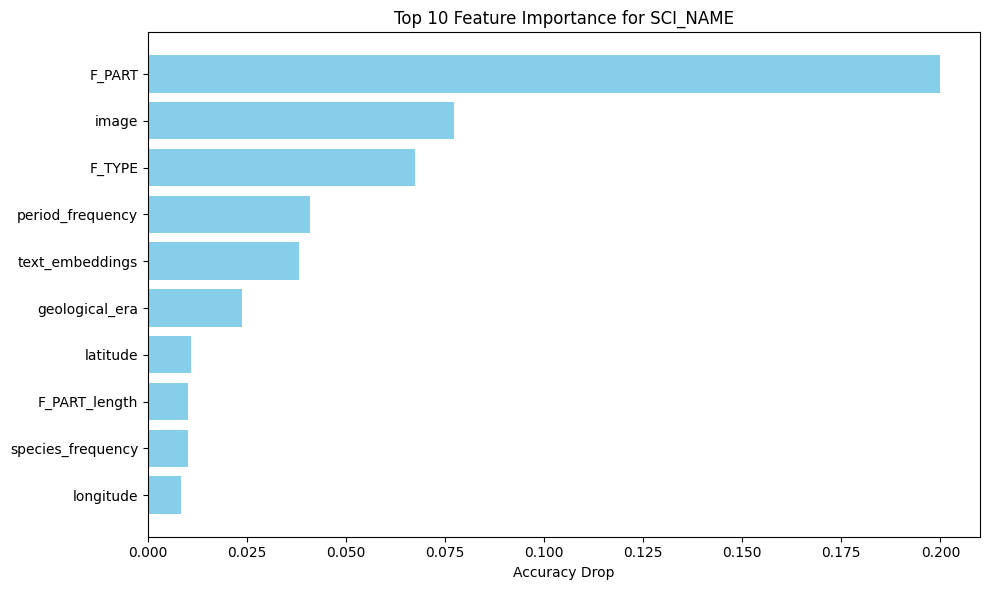

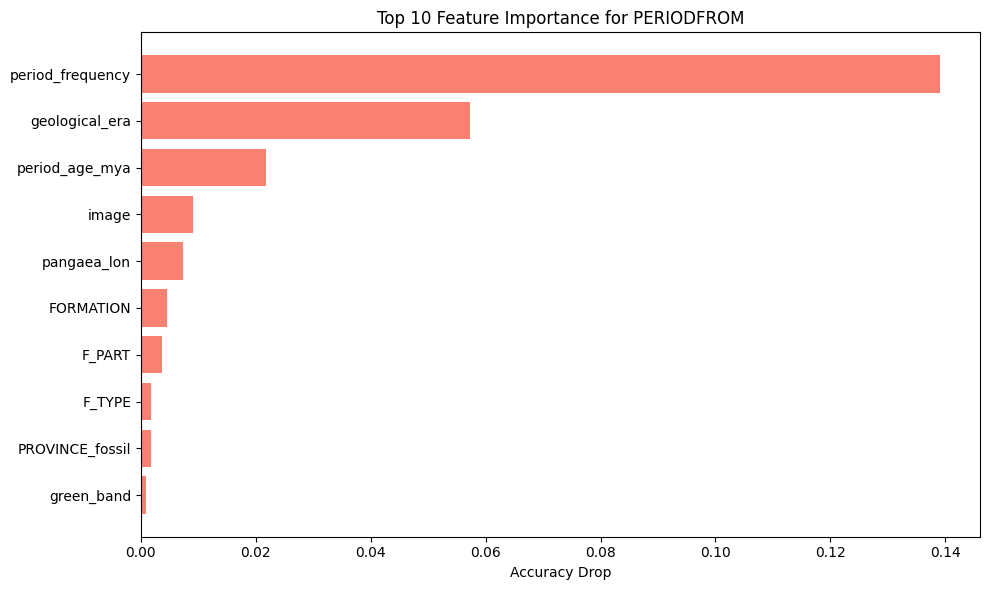

In [8]:
# Define top k value for plotting (change this value as needed)
top_k = 10

# Plot importance for SCI_NAME
plot_df_sci = importance_df_sci.head(top_k)
plt.figure(figsize=(10,6))
plt.barh(plot_df_sci['feature'], plot_df_sci['accuracy_drop'], color='skyblue')
plt.xlabel('Accuracy Drop')
plt.title(f'Top {top_k} Feature Importance for SCI_NAME')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.savefig('top_k_importance_sci.png')
plt.show()

# Plot importance for PERIODFROM
plot_df_period = importance_df_period.head(top_k)
plt.figure(figsize=(10,6))
plt.barh(plot_df_period['feature'], plot_df_period['accuracy_drop'], color='salmon')
plt.xlabel('Accuracy Drop')
plt.title(f'Top {top_k} Feature Importance for PERIODFROM')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.savefig('top_k_importance_period.png')
plt.show()

# Deploy

In [ ]:
!pip install gradio

Deploy Sleepless

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import gradio as gr
import matplotlib.pyplot as plt
import folium
import base64
import tempfile
import tensorflow as tf
from PIL import Image
import re
import pickle
import io
import json
import requests
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Try to import utm package
try:
    import utm
except ImportError:
    print("Installing UTM package...")
    !pip install -q utm
    import utm

# Try to import sentinelhub
try:
    from sentinelhub import SHConfig, SentinelHubRequest, MimeType, CRS, BBox, DataCollection, MosaickingOrder
except ImportError:
    print("Installing sentinelhub package...")
    !pip install -q sentinelhub
    from sentinelhub import SHConfig, SentinelHubRequest, MimeType, CRS, BBox, DataCollection, MosaickingOrder

# For Google Colab compatibility
try:
    from google.colab import output
    from IPython.display import HTML, display, IFrame
    IN_COLAB = True
    output.enable_custom_widget_manager()
    print("Running in Google Colab environment. Widget manager enabled.")
except:
    IN_COLAB = False
    print("Not running in Google Colab environment.")

# Install additional required packages for Colab if needed
if IN_COLAB:
    try:
        import folium
    except ImportError:
        !pip install -q folium
        import folium

    try:
        import branca
    except ImportError:
        !pip install -q branca
        import branca

# Paths for model files
MODEL_PATH = '/content/model/enhanced_fossil_model.h5'
SCALER_PATH = '/content/model/enhanced_fossil_model_scaler.pkl'
LABEL_ENCODERS_PATH = '/content/model/enhanced_fossil_model_label_encoders.pkl'
FEATURE_GROUPS_PATH = '/content/model/enhanced_fossil_model_feature_groups.pkl'
SATELLITE_DATA_DIR = '/content/satellite_data/'
SATELLITE_MAPS_DIR = '/content/satellite_maps/'

# Create necessary directories
os.makedirs(SATELLITE_DATA_DIR, exist_ok=True)
os.makedirs(SATELLITE_MAPS_DIR, exist_ok=True)
os.makedirs('model', exist_ok=True)

# Sentinel Hub credentials
SENTINEL_INSTANCE_ID = "6042f305-e734-420c-bc66-bbf0de1ac960"
SENTINEL_CLIENT_ID = "ac14f011-f105-491c-8b31-4568e2f70590"
SENTINEL_CLIENT_SECRET = "1BvZ1rCPBFYygsiiXKfu2KVQNpFgzWNl"
OPENWEATHER_API_KEY = "3718c28f9dc7148926ffc3956330c0fa"

# Thai provinces coordinates lookup table
THAILAND_PROVINCES = {
    'กรุงเทพ': (13.7563, 100.5018),  # Bangkok
    'เชียงใหม่': (18.7883, 98.9853),  # Chiang Mai
    'ภูเก็ต': (7.9519, 98.3381),      # Phuket
    'ขอนแก่น': (16.4319, 102.8362),   # Khon Kaen
    'ปราจีนบุรี': (14.0511, 101.3658), # Prachinburi
    'เพชรบุรี': (13.1133, 99.9430),   # Phetchaburi
    'ยะลา': (6.5416, 101.2804),       # Yala
    'เชียงราย': (19.9071, 99.8306),   # Chiang Rai
    'กาญจนบุรี': (14.0227, 99.5328),  # Kanchanaburi
    'พังงา': (8.4543, 98.5251),        # Phang Nga
    'สงขลา': (7.1991, 100.5998)       # Songkhla
}

# Period to era mapping (Thai period names to geological eras)
PERIOD_TO_ERA = {
    'เพอร์เมียน': 'Paleozoic',        # Permian
    'เพอร์เมียนตอนต้น': 'Paleozoic',  # Early Permian
    'ไทรแอสซิก': 'Mesozoic',          # Triassic
    'ไทรแอสซิกตอนต้น': 'Mesozoic',    # Early Triassic
    'ไทรแอสสิกตอนปลาย': 'Mesozoic',   # Late Triassic
    'จูแรสซิก': 'Mesozoic',            # Jurassic
    'จูแรสสิกตอนปลาย': 'Mesozoic',     # Late Jurassic
    'ครีเทเชียส': 'Mesozoic',          # Cretaceous
    'ครีเทเชียสตอนต้น': 'Mesozoic',    # Early Cretaceous
    'ครีเทเซียสตอนต้น': 'Mesozoic',    # Early Cretaceous (alternate spelling)
    'ออร์โดวิเชียน': 'Paleozoic',      # Ordovician
    'ออร์โดวีเชียน': 'Paleozoic',      # Ordovician (alternate spelling)
    'ออร์โดวีเชียน-ไซลูเรียน': 'Paleozoic', # Ordovician-Silurian
    'แคมเบรียนตอนปลาย': 'Paleozoic',  # Late Cambrian
    'ยออร์โดวิเชียน': 'Paleozoic',     # Ordovician (alternate spelling)
    'จูแรสสิกตอนปลายถึงครีเทเชียสตอนต้น': 'Mesozoic' # Late Jurassic to Early Cretaceous
}

# Period age mapping in millions of years ago (MYA)
PERIOD_AGES = {
    'เพอร์เมียน': 299,        # Permian
    'เพอร์เมียนตอนต้น': 290,  # Early Permian
    'ไทรแอสซิก': 251,         # Triassic
    'ไทรแอสซิกตอนต้น': 245,   # Early Triassic
    'ไทรแอสสิกตอนปลาย': 220,  # Late Triassic
    'จูแรสซิก': 201,           # Jurassic
    'จูแรสสิกตอนปลาย': 160,    # Late Jurassic
    'ครีเทเชียส': 145,         # Cretaceous
    'ครีเทเชียสตอนต้น': 140,   # Early Cretaceous
    'ครีเทเซียสตอนต้น': 140,   # Early Cretaceous (alternate spelling)
    'ออร์โดวิเชียน': 485,      # Ordovician
    'ออร์โดวีเชียน': 485,      # Ordovician (alternate spelling)
    'ออร์โดวีเชียน-ไซลูเรียน': 450, # Ordovician-Silurian
    'แคมเบรียนตอนปลาย': 500,  # Late Cambrian
    'ยออร์โดวิเชียน': 485,     # Ordovician (alternate spelling)
    'จูแรสสิกตอนปลายถึงครีเทเชียสตอนต้น': 150 # Late Jurassic to Early Cretaceous
}

# Global model variables
model = None
scaler = None
label_encoders = None
feature_groups = None

def load_model():
    """
    Load the TensorFlow model and preprocessors
    Returns:
        bool: True if loading was successful, False otherwise
    """
    global model, scaler, label_encoders, feature_groups

    try:
        print("Loading model components...")

        # Check if files exist
        missing_files = []
        for file_path in [MODEL_PATH, SCALER_PATH, LABEL_ENCODERS_PATH, FEATURE_GROUPS_PATH]:
            if not os.path.exists(file_path):
                missing_files.append(file_path)

        if missing_files:
            print(f"Missing required files: {', '.join(missing_files)}")
            return False

        # Load model
        model = tf.keras.models.load_model(MODEL_PATH, compile=False)

        # Load scaler
        with open(SCALER_PATH, 'rb') as f:
            scaler = pickle.load(f)

        # Load label encoders
        with open(LABEL_ENCODERS_PATH, 'rb') as f:
            label_encoders = pickle.load(f)

        # Load feature groups
        with open(FEATURE_GROUPS_PATH, 'rb') as f:
            feature_groups = pickle.load(f)

        print("Model components loaded successfully")
        return True

    except Exception as e:
        print(f"Error loading model components: {e}")
        return False

def convert_utm_to_latlon(utm_e, utm_n, zone):
    """
    Convert UTM coordinates to latitude/longitude

    Args:
        utm_e (float): UTM easting
        utm_n (float): UTM northing
        zone (str or int): UTM zone with optional hemisphere (e.g., '47N')

    Returns:
        tuple: (latitude, longitude) or (None, None) if conversion failed
    """
    try:
        # Parse the zone
        if isinstance(zone, str):
            # Extract the numeric part
            zone_num = int(re.findall(r'\d+', zone)[0])
            # Determine hemisphere (northern or southern)
            hemisphere = 'N' if 'N' in zone.upper() else 'S'
        else:
            # Default to zone 47N if not provided
            zone_num = 47
            hemisphere = 'N'

        # Fix values if needed - common issues in the dataset
        if utm_e > 999999:  # Too large
            utm_e = utm_e / 10
        elif utm_e < 100000:  # Too small
            utm_e = utm_e * 10

        # Convert to lat/lon
        lat, lon = utm.to_latlon(utm_e, utm_n, zone_num, hemisphere)
        return lat, lon

    except Exception as e:
        print(f"Failed to convert UTM: {e}")
        # Continue to next method
        return None, None

def get_coordinates(province, district, utm_e=None, utm_n=None, utm_zone=None):
    """
    Get coordinates from available information, using UTM if provided or province name as fallback

    Args:
        province (str): Province name in Thai
        district (str): District name in Thai
        utm_e (float): UTM easting
        utm_n (float): UTM northing
        utm_zone (str): UTM zone

    Returns:
        tuple: (latitude, longitude)
    """
    # First try to use UTM if provided
    if utm_e is not None and utm_n is not None and utm_zone is not None:
        lat_lon = convert_utm_to_latlon(utm_e, utm_n, utm_zone)
        if lat_lon[0] is not None:
            return lat_lon

    # Try to get coordinates from province name
    if province:
        for key, coords in THAILAND_PROVINCES.items():
            if key in province:
                return coords[0], coords[1]

    # Default to Bangkok coordinates
    return 13.7563, 100.5018

def approximate_pangaea_coords(lat, lon, age_mya):
    """
    Approximate Pangaea coordinates based on current location and age
    This is a simplified approximation of the tectonic plate movement

    Args:
        lat (float): Current latitude
        lon (float): Current longitude
        age_mya (float): Age in millions of years

    Returns:
        tuple: (pangaea_lat, pangaea_lon)
    """
    # Approximate movement based on age (simple linear shift)
    age_factor = min(age_mya / 300, 1.0)  # Normalize 0-1 for 300 Ma max

    # Thailand-specific estimation: Move southwest in older times
    lat_offset = -10 * age_factor
    lon_offset = -20 * age_factor

    return lat + lat_offset, lon + lon_offset

def fetch_sentinel_image(lat, lon, size=256, time_window_days=365):
    """
    Fetch a satellite image from Sentinel Hub for the given coordinates

    Args:
        lat (float): Latitude
        lon (float): Longitude
        size (int): Image size in pixels
        time_window_days (int): Days to look back for imagery

    Returns:
        tuple: (True/False for success, PIL Image or None, dict with metadata)
    """
    try:
        # Configure Sentinel Hub
        config = SHConfig()
        config.instance_id = SENTINEL_INSTANCE_ID
        config.sh_client_id = SENTINEL_CLIENT_ID
        config.sh_client_secret = SENTINEL_CLIENT_SECRET

        # Set up time window
        end_date = datetime.now()
        start_date = end_date - timedelta(days=time_window_days)
        time_interval = (start_date.strftime("%Y-%m-%d"), end_date.strftime("%Y-%m-%d"))

        # Create bounding box (0.02 degrees is about 2.2 km)
        bbox = BBox(bbox=[lon - 0.02, lat - 0.02, lon + 0.02, lat + 0.02], crs=CRS.WGS84)

        # True color RGB request
        true_color_request = SentinelHubRequest(
            evalscript="""
                //VERSION=3
                function setup() {
                    return {
                        input: ["B02", "B03", "B04"],
                        output: { bands: 3 }
                    };
                }

                function evaluatePixel(sample) {
                    return [2.5 * sample.B04, 2.5 * sample.B03, 2.5 * sample.B02];
                }
            """,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L2A,
                    time_interval=time_interval,
                    mosaicking_order=MosaickingOrder.LEAST_CC
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.PNG)
            ],
            bbox=bbox,
            size=(size, size),
            config=config
        )

        # NDVI request
        ndvi_request = SentinelHubRequest(
            evalscript="""
                //VERSION=3
                function setup() {
                    return {
                        input: ["B04", "B08"],
                        output: {
                            bands: 1,
                            sampleType: "FLOAT32"
                        }
                    };
                }

                function evaluatePixel(sample) {
                    let ndvi = (sample.B08 - sample.B04) / (sample.B08 + sample.B04);
                    return [ndvi];
                }
            """,
            input_data=[
                SentinelHubRequest.input_data(
                    data_collection=DataCollection.SENTINEL2_L2A,
                    time_interval=time_interval,
                    mosaicking_order=MosaickingOrder.LEAST_CC
                )
            ],
            responses=[
                SentinelHubRequest.output_response('default', MimeType.TIFF)
            ],
            bbox=bbox,
            size=(size, size),
            config=config
        )

        # Get the RGB data
        rgb_data = true_color_request.get_data()
        if len(rgb_data) == 0:
            print("No RGB data returned from Sentinel Hub")
            return False, None, {}

        # RGB image
        rgb_image = Image.fromarray(rgb_data[0])

        # Save the RGB image
        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        img_path = os.path.join(SATELLITE_DATA_DIR, f'sentinel_{timestamp}.png')
        rgb_image.save(img_path)

        # Get NDVI data
        try:
            ndvi_data = ndvi_request.get_data()[0]
            # Calculate mean NDVI, excluding no-data values (typically < -1 or > 1)
            valid_ndvi = ndvi_data[(ndvi_data > -1) & (ndvi_data < 1)]
            if len(valid_ndvi) > 0:
                mean_ndvi = float(np.mean(valid_ndvi))
            else:
                mean_ndvi = 0

            # Save NDVI visualization
            ndvi_path = os.path.join(SATELLITE_DATA_DIR, f'ndvi_{timestamp}.png')
            plt.figure(figsize=(5, 5))
            plt.imshow(ndvi_data, cmap='RdYlGn', vmin=-1, vmax=1)
            plt.colorbar(label='NDVI')
            plt.title(f'NDVI - {timestamp}')
            plt.axis('off')
            plt.savefig(ndvi_path)
            plt.close()

            # Create spectral data
            spectral_data = {
                'ndvi': mean_ndvi,
                'red_band': float(np.mean(rgb_data[0][:, :, 0])) / 255.0,
                'green_band': float(np.mean(rgb_data[0][:, :, 1])) / 255.0,
                'blue_band': float(np.mean(rgb_data[0][:, :, 2])) / 255.0,
                'nir_band': float(np.mean(valid_ndvi) * 0.5 + 0.5),  # Approximate NIR
                'rgb_path': img_path,
                'ndvi_path': ndvi_path
            }

            return True, rgb_image, spectral_data

        except Exception as e:
            print(f"Error processing NDVI data: {e}")
            # Still return the RGB image but with limited spectral data
            spectral_data = {
                'ndvi': 0.5,  # Default value
                'red_band': float(np.mean(rgb_data[0][:, :, 0])) / 255.0,
                'green_band': float(np.mean(rgb_data[0][:, :, 1])) / 255.0,
                'blue_band': float(np.mean(rgb_data[0][:, :, 2])) / 255.0,
                'nir_band': 0.5,  # Default value
                'rgb_path': img_path
            }

            return True, rgb_image, spectral_data

    except Exception as e:
        print(f"Error fetching Sentinel image: {e}")
        return False, None, {}

def create_simulated_satellite_image(lat, lon):
    """
    Create a simulated satellite image based on coordinates

    Args:
        lat (float): Latitude
        lon (float): Longitude

    Returns:
        tuple: (PIL Image, dict of spectral data)
    """
    size = 256
    seed = int((lat + 90) * 1000 + (lon + 180) * 10)
    np.random.seed(seed)

    # Create base channels
    simulated_r = np.zeros((size, size))
    simulated_g = np.zeros((size, size))
    simulated_b = np.zeros((size, size))

    # Base colors - varies by location
    base_r = np.random.uniform(0.10, 0.20)
    base_g = np.random.uniform(0.15, 0.25)
    base_b = np.random.uniform(0.05, 0.15)

    # Generate patterns
    for i in range(size):
        for j in range(size):
            # Land or water - 70% probability of land
            is_land = np.random.random() > 0.3

            if is_land:
                # Land: green and brown
                simulated_r[i, j] = base_r + np.random.uniform(-0.05, 0.05)
                simulated_g[i, j] = base_g + np.random.uniform(-0.05, 0.05)
                simulated_b[i, j] = base_b + np.random.uniform(-0.05, 0.05)
            else:
                # Water: blue
                simulated_r[i, j] = np.random.uniform(0.03, 0.10)
                simulated_g[i, j] = np.random.uniform(0.10, 0.20)
                simulated_b[i, j] = np.random.uniform(0.30, 0.40)

    # Add landscape patterns based on coordinates
    x = np.linspace(0, 10, size)
    y = np.linspace(0, 10, size)
    x_grid, y_grid = np.meshgrid(x, y)

    pattern1 = np.sin(x_grid + lat/10) * np.cos(y_grid + lon/10) * 0.05
    pattern2 = np.sin(x_grid * 2 + lon/5) * np.cos(y_grid * 2 + lat/5) * 0.03

    simulated_r += pattern1
    simulated_g += pattern2
    simulated_b += (pattern1 + pattern2) / 2

    # Clip values to valid range
    simulated_r = np.clip(simulated_r, 0, 1)
    simulated_g = np.clip(simulated_g, 0, 1)
    simulated_b = np.clip(simulated_b, 0, 1)

    # Create RGB image
    rgb_img = np.stack([simulated_r, simulated_g, simulated_b], axis=2)

    # Convert to PIL Image
    img_array = (rgb_img * 255).astype(np.uint8)
    img = Image.fromarray(img_array)

    # Create a timestamp-based unique filename
    timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
    img_path = os.path.join(SATELLITE_DATA_DIR, f'simulated_{timestamp}.png')
    img.save(img_path)
    print(f"Saved simulated satellite image to: {img_path}")

    # Calculate NDVI (Normalized Difference Vegetation Index)
    ndvi = (simulated_g - simulated_r) / (simulated_g + simulated_r + 1e-10)
    ndvi = np.clip(ndvi, -1, 1)
    mean_ndvi = float(np.mean(ndvi))

    # Return image and spectral data
    return img, {
        'ndvi': mean_ndvi,
        'red_band': float(np.mean(simulated_r)),
        'green_band': float(np.mean(simulated_g)),
        'blue_band': float(np.mean(simulated_b)),
        'nir_band': float(np.mean(simulated_g) * 1.2),  # Approximate NIR
        'rgb_path': img_path
    }

def create_folium_map_html(lat, lon, fossil_id, sci_name, period, era):
    """
    Create an interactive folium map as HTML

    Args:
        lat (float): Latitude
        lon (float): Longitude
        fossil_id (str): Fossil ID
        sci_name (str): Scientific name
        period (str): Geological period
        era (str): Geological era

    Returns:
        str: HTML content of the map
    """
    try:
        # Create map with satellite imagery
        m = folium.Map(
            location=[lat, lon],
            zoom_start=14,
            tiles=None
        )

        # Add satellite layer
        folium.TileLayer(
            'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            name='Satellite',
            attr='Esri'
        ).add_to(m)

        # Add a street map layer as an alternative
        folium.TileLayer('OpenStreetMap', name='Street Map').add_to(m)

        # Customize popup
        popup_html = f"""
        <div style="font-family: sans-serif; min-width: 180px;">
            <h4 style="margin-bottom: 10px;">Fossil ID: {fossil_id}</h4>
            <table>
                <tr><td><b>Scientific Name:</b></td><td>{sci_name}</td></tr>
                <tr><td><b>Period:</b></td><td>{period}</td></tr>
                <tr><td><b>Era:</b></td><td>{era}</td></tr>
                <tr><td><b>Coordinates:</b></td><td>{lat:.6f}, {lon:.6f}</td></tr>
            </table>
        </div>
        """

        # Add marker with popup
        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_html, max_width=300),
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

        # Add circle to highlight the location
        folium.CircleMarker(
            location=[lat, lon],
            radius=50,
            color='red',
            fill=True,
            fill_opacity=0.3
        ).add_to(m)

        # Add layer control
        folium.LayerControl().add_to(m)

        # Save map to temporary HTML file
        _, temp_html_file = tempfile.mkstemp(suffix='.html')
        m.save(temp_html_file)

        # Read the HTML content
        with open(temp_html_file, 'r', encoding='utf-8') as f:
            html_content = f.read()

        # Clean up
        os.unlink(temp_html_file)

        return html_content

    except Exception as e:
        print(f"Error creating folium map: {e}")
        return None

def create_folium_iframe_html(lat, lon, fossil_id, sci_name, period, era, height=400):
    """
    Create a self-contained HTML with an iframe showing an interactive folium map

    Args:
        lat (float): Latitude
        lon (float): Longitude
        fossil_id (str): Fossil ID
        sci_name (str): Scientific name
        period (str): Geological period
        era (str): Geological era
        height (int): Height of the iframe

    Returns:
        str: HTML content with iframe
    """
    try:
        # Get the folium map HTML
        map_html = create_folium_map_html(lat, lon, fossil_id, sci_name, period, era)
        if not map_html:
            return None

        # Save to a temporary file
        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        map_path = os.path.join(SATELLITE_MAPS_DIR, f'map_{fossil_id}_{timestamp}.html')
        with open(map_path, 'w', encoding='utf-8') as f:
            f.write(map_html)

        print(f"Saved interactive map to: {map_path}")

        # Create iframe HTML
        iframe_html = f"""
        <style>
            .map-container {{
                width: 100%;
                height: {height}px;
                border: 1px solid #ccc;
                border-radius: 8px;
                overflow: hidden;
            }}
            .map-container iframe {{
                width: 100%;
                height: 100%;
                border: none;
            }}
        </style>
        <div class="map-container">
            <iframe src="{map_path}"></iframe>
        </div>
        """

        return iframe_html, map_path

    except Exception as e:
        print(f"Error creating map iframe: {e}")
        return None, None

def embed_folium_map_in_html(lat, lon, fossil_id, sci_name, period, era):
    """
    Create HTML with embedded folium map for Gradio display

    Args:
        lat (float): Latitude
        lon (float): Longitude
        fossil_id (str): Fossil ID
        sci_name (str): Scientific name
        period (str): Geological period
        era (str): Geological era

    Returns:
        str: HTML content with embedded map
    """
    try:
        # Create a folium map
        m = folium.Map(
            location=[lat, lon],
            zoom_start=14,
            tiles=None,
            width='100%',
            height='100%'
        )

        # Add satellite layer as the default
        folium.TileLayer(
            'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
            name='Satellite',
            attr='Esri'
        ).add_to(m)

        # Add a street map layer as an alternative
        folium.TileLayer('OpenStreetMap', name='Street Map').add_to(m)

        # Create popup content
        popup_content = f"""
        <div style="font-family: sans-serif; width: 200px;">
            <h4 style="margin-bottom: 10px;">Fossil ID: {fossil_id}</h4>
            <table>
                <tr><td><b>Scientific Name:</b></td><td>{sci_name}</td></tr>
                <tr><td><b>Period:</b></td><td>{period}</td></tr>
                <tr><td><b>Era:</b></td><td>{era}</td></tr>
                <tr><td><b>Coordinates:</b></td><td>{lat:.6f}, {lon:.6f}</td></tr>
            </table>
        </div>
        """

        # Add marker and circle
        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_content, max_width=300),
            icon=folium.Icon(color='red', icon='info-sign')
        ).add_to(m)

        # Add circle to highlight the area
        folium.CircleMarker(
            location=[lat, lon],
            radius=50,
            color='red',
            fill=True,
            fill_opacity=0.3
        ).add_to(m)

        # Add layer control
        folium.LayerControl().add_to(m)

        # Get HTML representation
        timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
        map_path = os.path.join(SATELLITE_MAPS_DIR, f'map_{fossil_id}_{timestamp}.html')
        m.save(map_path)

        # Create iframe src data URI
        with open(map_path, 'r', encoding='utf-8') as f:
            html_content = f.read()

        # Create HTML with iframe
        result_html = f"""
        <div style="width:100%; height:400px; overflow:hidden; border:1px solid #ccc; border-radius:8px;">
            <iframe srcdoc="{html_content.replace('"', '&quot;')}"
                    style="width:100%; height:400px; border:none;"
                    frameborder="0"></iframe>
        </div>
        """

        print(f"Created embedded map: {map_path}")
        return result_html, map_path

    except Exception as e:
        print(f"Error creating embedded map: {e}")
        return None, None

def create_ndvi_image(lat, lon, ndvi_value):
    """
    Create a visualization of NDVI data

    Args:
        lat (float): Latitude
        lon (float): Longitude
        ndvi_value (float): NDVI value

    Returns:
        PIL.Image: NDVI visualization
    """
    # Create a simple visualization
    fig, ax = plt.subplots(figsize=(5, 5))

    # Create a color gradient from red to green
    cmap = plt.cm.RdYlGn
    norm = plt.Normalize(-1, 1)

    # Create a color bar with the NDVI value highlighted
    gradient = np.linspace(-1, 1, 100)
    gradient = gradient.reshape(1, -1)
    ax.imshow(gradient, aspect='auto', cmap=cmap, norm=norm)

    # Add a marker for the current NDVI value
    position = (ndvi_value + 1) * 50  # Map from [-1,1] to [0,100]
    ax.axvline(position, color='black', linewidth=2)

    # Add title and labels
    ax.set_title(f'NDVI: {ndvi_value:.2f}')
    ax.set_xticks([-0.5, 24.5, 49.5, 74.5, 99.5])
    ax.set_xticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0'])
    ax.set_yticks([])

    # Add explanation
    ax.text(0, -0.5, 'Low Vegetation', ha='left', va='top', transform=ax.transAxes)
    ax.text(1, -0.5, 'High Vegetation', ha='right', va='top', transform=ax.transAxes)

    # Save image to buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=100, bbox_inches='tight')
    plt.close(fig)
    buf.seek(0)

    # Convert to PIL Image
    img = Image.open(buf)
    return img

def preprocess_input(input_data, use_sentinel=True):
    """
    Process input data for model prediction
    This function applies the same preprocessing steps as in the training pipeline

    Args:
        input_data (dict): Input data from form
        use_sentinel (bool): Whether to use Sentinel Hub for imagery

    Returns:
        tuple: (DataFrame with processed features, satellite image, map HTML, map path)
    """
    # Generate fossil ID if not provided
    if not input_data.get('FOSSIL_ID'):
        input_data['FOSSIL_ID'] = f"PRED_{datetime.now().strftime('%Y%m%d%H%M%S')}"

    # Get coordinates
    lat, lon = get_coordinates(
        input_data.get('PROVINCE', ''),
        input_data.get('DISTRICT', ''),
        input_data.get('UTM_E'),
        input_data.get('UTM_N'),
        input_data.get('UTM_ZONE')
    )

    print(f"Location determined: lat={lat}, lon={lon}")

    # Create DataFrame
    df = pd.DataFrame([input_data])

    # Add coordinates
    df['latitude'] = lat
    df['longitude'] = lon

    # Add period age based on default or estimated period
    df['period_age_mya'] = 200  # Default to approximate Jurassic age

    # Add Pangaea coordinates
    pangaea_lat, pangaea_lon = approximate_pangaea_coords(lat, lon, df['period_age_mya'].iloc[0])
    df['pangaea_lat'] = pangaea_lat
    df['pangaea_lon'] = pangaea_lon
    df['pangaea_coords_approximated'] = 1

    # Try to get real satellite data from Sentinel Hub
    if use_sentinel:
        success, satellite_img, spectral_data = fetch_sentinel_image(lat, lon)
    else:
        success = False

    # If Sentinel Hub failed or is disabled, use simulated data
    if not success:
        satellite_img, spectral_data = create_simulated_satellite_image(lat, lon)

    # Add spectral bands
    df['ndvi'] = spectral_data.get('ndvi', 0.5)
    df['red_band'] = spectral_data.get('red_band', 0.3)
    df['green_band'] = spectral_data.get('green_band', 0.4)
    df['blue_band'] = spectral_data.get('blue_band', 0.2)
    df['nir_band'] = spectral_data.get('nir_band', 0.6)

    # Add terrain features
    df['elevation_simulated'] = (np.sin(lat * 5) * np.cos(lon * 5) * 500 + 500)

    # Add text features
    for col in ['FOS_DES_TH', 'GEO_DES_TH', 'F_PART']:
        if col in df.columns:
            df[f'{col}_length'] = df[col].astype(str).str.len()
        else:
            df[f'{col}_length'] = 0

    # Add keyword features
    fossil_keywords = ['กระดูก', 'ฟัน', 'ฟอสซิล', 'ปะการัง', 'เปลือก', 'แบรคิโอพอด']
    for keyword in fossil_keywords:
        if 'FOS_DES_TH' in df.columns and not pd.isna(df['FOS_DES_TH'].iloc[0]):
            df[f'has_{keyword}'] = df['FOS_DES_TH'].astype(str).str.contains(keyword).astype(int)
        else:
            df[f'has_{keyword}'] = 0

    # Add text embeddings (simulated)
    for i in range(10):
        df[f'text_embedding_{i}'] = np.random.randn(len(df))
    df['text_embedding_norm'] = np.random.uniform(0.9, 1.1, len(df))
    df['has_bert_embeddings'] = 0

    # Add data source flag
    df['has_real_satellite_data'] = 1 if success else 0

    # Add statistical features
    df['species_frequency'] = 1
    df['location_frequency'] = 1
    df['province_density'] = 1
    df['period_frequency'] = 1
    df['group_frequency'] = 1

    # Add categorical features
    df['group_id'] = 0
    df['period_id'] = 0

    # Add image paths
    df['satellite_img_path'] = spectral_data.get('rgb_path', '')
    df['map_img_path'] = ''
    df['direct_satellite_img_path'] = spectral_data.get('rgb_path', '')

    # Ensure all features needed by the model exist
    if feature_groups:
        for feature_type, features in feature_groups.items():
            if feature_type in ['binary', 'numeric', 'text_embeddings']:
                for feature in features:
                    if feature not in df.columns:
                        print(f"Adding missing feature: {feature}")
                        df[feature] = 0

    # Create NDVI visualization if data is available
    ndvi_img = None
    if 'ndvi' in df.columns:
        ndvi_img = create_ndvi_image(lat, lon, df['ndvi'].iloc[0])

    return df, satellite_img, ndvi_img

def prepare_model_inputs(df):
    """
    Format inputs for model prediction
    This function prepares the input data in the format expected by the model

    Args:
        df (DataFrame): Processed features DataFrame

    Returns:
        list: List of model inputs ready for prediction
    """
    if not feature_groups or not scaler:
        return None

    model_inputs = []

    # Binary features
    if 'binary' in feature_groups and feature_groups['binary']:
        binary_features = feature_groups['binary']
        for feature in binary_features:
            if feature not in df.columns:
                df[feature] = 0
        binary_data = df[binary_features].astype(float).values
        model_inputs.append(binary_data)

    # Numeric features
    if 'numeric' in feature_groups and feature_groups['numeric']:
        numeric_features = feature_groups['numeric']
        for feature in numeric_features:
            if feature not in df.columns:
                df[feature] = 0
        numeric_data = df[numeric_features].astype(float)
        try:
            numeric_data_scaled = scaler.transform(numeric_data)
            model_inputs.append(numeric_data_scaled)
        except Exception as e:
            print(f"Error scaling numeric features: {e}")
            # Fallback to unscaled data
            model_inputs.append(numeric_data.values)

    # Categorical features
    if 'categorical' in feature_groups and feature_groups['categorical']:
        categorical_features = feature_groups['categorical']
        for feature in categorical_features:
            # Placeholder arrays - we don't have actual categorical data for inference
            model_inputs.append(np.array([[0]]))

    # Text embeddings
    if 'text_embeddings' in feature_groups and feature_groups['text_embeddings']:
        text_embedding_features = feature_groups['text_embeddings']
        for feature in text_embedding_features:
            if feature not in df.columns:
                df[feature] = 0
        text_embeddings = df[text_embedding_features].values
        model_inputs.append(text_embeddings)

    # Image data
    if 'image' in feature_groups and feature_groups['image']:
        # Placeholder image data - we use simulated images during inference
        image_data = np.ones((1, 300, 300, 3)) * 0.5
        model_inputs.append(image_data)

    return model_inputs

def make_prediction(input_data, use_sentinel=True):
    """
    Process input data and make a prediction
    This is the main function that ties together preprocessing, model prediction, and result formatting

    Args:
        input_data (dict): Input data from form
        use_sentinel (bool): Whether to use Sentinel Hub for imagery

    Returns:
        dict: Prediction results
    """
    try:
        # Check if model is loaded
        if not model or not scaler or not label_encoders or not feature_groups:
            return {"error": "Model components not loaded. Please check the model files."}

        # Preprocess input data
        df, satellite_img, ndvi_img = preprocess_input(input_data, use_sentinel)
        if df is None:
            return {"error": "Failed to preprocess input data"}

        # Prepare model inputs
        model_inputs = prepare_model_inputs(df)
        if model_inputs is None:
            return {"error": "Failed to prepare model inputs"}

        # Make prediction
        try:
            predictions = model.predict(model_inputs)
        except Exception as e:
            return {"error": f"Model prediction failed: {str(e)}"}

        # Get fossil ID
        fossil_id = df['FOSSIL_ID'].iloc[0]

        # Get coordinates
        lat = df['latitude'].iloc[0]
        lon = df['longitude'].iloc[0]

        # Process scientific name predictions
        sci_name_probs = predictions[0][0]
        sci_name_indices = np.argsort(sci_name_probs)[::-1][:5]  # Top 5

        sci_name_predictions = []
        for idx in sci_name_indices:
            class_name = label_encoders['SCI_NAME'].classes_[idx]
            probability = float(sci_name_probs[idx])
            sci_name_predictions.append({
                "class": class_name,
                "probability": probability
            })

        # Process period predictions
        period_probs = predictions[1][0]
        period_indices = np.argsort(period_probs)[::-1][:5]  # Top 5

        period_predictions = []
        for idx in period_indices:
            class_name = label_encoders['PERIODFROM'].classes_[idx]
            probability = float(period_probs[idx])
            period_predictions.append({
                "class": class_name,
                "probability": probability
            })

        # Get top predictions
        top_sci_name = sci_name_predictions[0]["class"]
        top_period = period_predictions[0]["class"]

        # Get era from period
        era = PERIOD_TO_ERA.get(top_period, 'Unknown')

        # Create interactive map
        map_html, map_path = embed_folium_map_in_html(lat, lon, fossil_id, top_sci_name, top_period, era)

        # Return results
        return {
            "sci_name_prediction": sci_name_predictions,
            "period_prediction": period_predictions,
            "satellite_image": satellite_img,
            "ndvi_image": ndvi_img,
            "map_html": map_html,
            "map_path": map_path,
            "latitude": lat,
            "longitude": lon,
            "fossil_id": fossil_id,
            "era": era,
            "sci_name": top_sci_name,
            "period": top_period,
            "has_real_satellite": df['has_real_satellite_data'].iloc[0] == 1
        }

    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}"}

def format_results(results):
    """
    Format prediction results for display in the Gradio interface

    Args:
        results (dict): Prediction results from make_prediction

    Returns:
        tuple: Formatted results for Gradio components
    """
    if 'error' in results:
        return (
            f"⚠️ Error: {results['error']}",
            None, None, None,
            None, None,
            "Error occurred during processing."
        )

    # Format scientific name predictions
    sci_name_html = "<div style='background-color: #2D2D2D; padding: 15px; border-radius: 8px; margin-bottom: 15px;'>"
    sci_name_html += "<h3 style='color: #D98859; margin-top: 0;'>🔬 Scientific Name Prediction</h3>"
    sci_name_html += "<table style='width: 100%; border-collapse: collapse;'>"
    sci_name_html += "<tr><th style='text-align: left; padding: 8px; border-bottom: 1px solid #8B5D33; color: #F0F0F0;'>Species</th>"
    sci_name_html += "<th style='text-align: right; padding: 8px; border-bottom: 1px solid #8B5D33; color: #F0F0F0;'>Confidence</th></tr>"

    for pred in results["sci_name_prediction"]:
        # Highlight the top prediction
        if pred == results["sci_name_prediction"][0]:
            sci_name_html += f"<tr style='background-color: rgba(139, 93, 51, 0.3);'><td style='padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0; font-weight: bold;'>{pred['class']}</td>"
            sci_name_html += f"<td style='text-align: right; padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0; font-weight: bold;'>{pred['probability']:.1%}</td></tr>"
        else:
            sci_name_html += f"<tr><td style='padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0;'>{pred['class']}</td>"
            sci_name_html += f"<td style='text-align: right; padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0;'>{pred['probability']:.1%}</td></tr>"

    sci_name_html += "</table></div>"

    # Format period predictions
    period_html = "<div style='background-color: #2D2D2D; padding: 15px; border-radius: 8px; margin-bottom: 15px;'>"
    period_html += "<h3 style='color: #D98859; margin-top: 0;'>⏳ Period Prediction</h3>"
    period_html += "<table style='width: 100%; border-collapse: collapse;'>"
    period_html += "<tr><th style='text-align: left; padding: 8px; border-bottom: 1px solid #8B5D33; color: #F0F0F0;'>Period</th>"
    period_html += "<th style='text-align: right; padding: 8px; border-bottom: 1px solid #8B5D33; color: #F0F0F0;'>Confidence</th></tr>"

    for pred in results["period_prediction"]:
        # Highlight the top prediction
        if pred == results["period_prediction"][0]:
            period_html += f"<tr style='background-color: rgba(139, 93, 51, 0.3);'><td style='padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0; font-weight: bold;'>{pred['class']}</td>"
            period_html += f"<td style='text-align: right; padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0; font-weight: bold;'>{pred['probability']:.1%}</td></tr>"
        else:
            period_html += f"<tr><td style='padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0;'>{pred['class']}</td>"
            period_html += f"<td style='text-align: right; padding: 8px; border-bottom: 1px solid #444; color: #F0F0F0;'>{pred['probability']:.1%}</td></tr>"

    period_html += "</table></div>"

    # Location info
    location_html = "<div style='background-color: #2D2D2D; padding: 15px; border-radius: 8px;'>"
    location_html += "<h3 style='color: #D98859; margin-top: 0;'>📍 Location Information</h3>"
    location_html += f"<p style='color: #F0F0F0;'>Fossil ID: {results['fossil_id']}</p>"
    location_html += f"<p style='color: #F0F0F0;'>Latitude: {results['latitude']:.6f}</p>"
    location_html += f"<p style='color: #F0F0F0;'>Longitude: {results['longitude']:.6f}</p>"
    location_html += f"<p style='color: #F0F0F0;'>Era: {results['era']}</p>"

    # Add data source info
    if results.get('has_real_satellite', False):
        location_html += f"<p style='color: #4CAF50;'>✓ Using real Sentinel satellite data</p>"
    else:
        location_html += f"<p style='color: #FFA500;'>Using simulated satellite data</p>"

    location_html += "</div>"

    # Summary
    summary = f"""
    <div style='color: #F0F0F0;'>
        <h2 style='color: #D98859;'>Fossil Classification Results</h2>
        <p>Scientific Name: <strong>{results['sci_name_prediction'][0]['class']}</strong>
           ({results['sci_name_prediction'][0]['probability']:.1%})</p>
        <p>Geological Period: <strong>{results['period_prediction'][0]['class']}</strong>
           ({results['period_prediction'][0]['probability']:.1%})</p>
    </div>
    """

    # Return formatted results
    return (
        summary,
        sci_name_html,
        period_html,
        location_html,
        results["satellite_image"],
        results["ndvi_image"],
        results["map_html"]
    )

# Create Gradio interface
def create_interface():
    # Custom CSS for dark theme with fossil aesthetics
    css = """
    body, .gradio-container {
        background-color: #1A1A1A !important;
        color: #F0F0F0 !important;
    }

    h1, h2, h3 {
        color: #D98859 !important;
    }

    .gr-button-primary {
        background-color: #8B5D33 !important;
    }

    .gr-button-secondary {
        background-color: #447265 !important;
        color: #F0F0F0 !important;
    }

    .gr-input, .gr-textarea, .gr-dropdown {
        background-color: #2D2D2D !important;
        border: 1px solid #8B5D33 !important;
        color: #F0F0F0 !important;
    }

    .gr-box, .gr-panel {
        background-color: #2D2D2D !important;
        border: 1px solid #447265 !important;
    }

    .gr-form {
        border-color: #8B5D33 !important;
    }

    iframe {
        border: none !important;
        width: 100% !important;
        height: 400px !important;
    }

    .gradio-container::before {
        content: "";
        position: fixed;
        top: 0;
        left: 0;
        width: 100%;
        height: 100%;
        background: url('https://cdn.pixabay.com/photo/2017/01/31/17/10/dinosaur-2025645_1280.png') no-repeat;
        background-position: bottom right;
        background-size: 300px;
        opacity: 0.03;
        pointer-events: none;
        z-index: -1;
    }
    """

    # Create interface
    interface = gr.Blocks(css=css, theme="dark")

    with interface:
        # Load model if not already loaded
        if not model:
            if not load_model():
                gr.Markdown("# ⚠️ Failed to load model")
                gr.Markdown("Please check that the model files are in the correct location:")
                gr.Code(f"MODEL_PATH: {MODEL_PATH}\nSCALER_PATH: {SCALER_PATH}\nLABEL_ENCODERS_PATH: {LABEL_ENCODERS_PATH}\nFEATURE_GROUPS_PATH: {FEATURE_GROUPS_PATH}")
                return interface

        # Header
        gr.Markdown("# 🦕 Fossil Classification System")
        gr.Markdown("Enter fossil information to predict scientific name and geological period")

        # Basic input form
        with gr.Row():
            with gr.Column():
                # Basic inputs
                fossil_id = gr.Textbox(label="Fossil ID", info="Enter ID (if available)")
                f_group = gr.Dropdown(
                    label="Fossil Group",
                    choices=["Vertebrate", "Invertebrate", "Plant", "Trace", "Unknown"],
                    value="Unknown",
                    info="Type of fossil group"
                )
                f_type = gr.Textbox(label="Fossil Type", info="e.g., Dinosaur, Ammonite")
                com_name = gr.Textbox(label="Common Name", info="Common name of the fossil")

            with gr.Column():
                # Location inputs (Province & District OR UTM)
                gr.Markdown("### 📍 Location Information (Required: Province+District OR UTM Coordinates)")
                with gr.Row():
                    with gr.Column():
                        province = gr.Textbox(label="Province*", info="Province where fossil was found")
                        district = gr.Textbox(label="District*", info="District where fossil was found")

                with gr.Row():
                    with gr.Column():
                        utm_e = gr.Number(label="UTM Easting", info="UTM E coordinate")
                        utm_n = gr.Number(label="UTM Northing", info="UTM N coordinate")
                        utm_zone = gr.Textbox(label="UTM Zone", value="47N", info="UTM zone")

        # Warning message for required fields
        warning_msg = gr.HTML("""
        <div style="background-color: rgba(255, 107, 107, 0.1); color: #FF6B6B; border: 1px solid #FF6B6B;
             border-radius: 4px; padding: 8px 12px; margin-top: 8px; display: none;" id="warning-box">
            <p>⚠️ <strong>Please provide location information:</strong> Province and District OR UTM coordinates (E, N, Zone)</p>
        </div>
        """)

        # Additional info section
        with gr.Row():
            with gr.Column():
                # Other details
                geo_group = gr.Textbox(label="Geological Group", info="Geological group if known")
                formation = gr.Textbox(label="Formation", info="Rock formation where found")
                fos_des = gr.Textbox(label="Fossil Description", info="Details of the fossil", lines=3)
                f_part = gr.Textbox(label="Fossil Parts Found", info="e.g., Bones, Teeth", lines=3)
                geo_des = gr.Textbox(label="Geological Description", info="Geological details", lines=3)

        # Options
        with gr.Row():
            use_sentinel = gr.Checkbox(
                label="Use Sentinel Hub API",
                value=True,
                info="If enabled, real satellite data will be fetched from Sentinel Hub"
            )

        # Buttons
        with gr.Row():
            classify_btn = gr.Button("Classify Fossil", variant="primary")
            clear_btn = gr.Button("Clear Fields", variant="secondary")

        # Results area
        with gr.Row():
            result_summary = gr.HTML(label="Classification Results")

        with gr.Row():
            with gr.Column(scale=1):
                with gr.Row():
                    sci_name_results = gr.HTML(label="Scientific Name")

                with gr.Row():
                    period_results = gr.HTML(label="Geological Period")

                with gr.Row():
                    location_info = gr.HTML(label="Location Information")

            with gr.Column(scale=1):
                with gr.Row():
                    satellite_image = gr.Image(label="Satellite Image", type="pil")

                with gr.Row():
                    ndvi_image = gr.Image(label="NDVI Visualization", type="pil")

                with gr.Row():
                    # Interactive map using HTML
                    map_html = gr.HTML(label="Interactive Map")

        # Function to validate inputs
        def validate_inputs(province_val, district_val, utm_e_val, utm_n_val, utm_zone_val):
            has_province = province_val and district_val
            has_utm = utm_e_val is not None and utm_n_val is not None and utm_zone_val

            if not has_province and not has_utm:
                return """
                <div style="background-color: rgba(255, 107, 107, 0.1); color: #FF6B6B; border: 1px solid #FF6B6B;
                     border-radius: 4px; padding: 8px 12px; margin-top: 8px;">
                    <p>⚠️ <strong>Please provide location information:</strong> Province and District OR UTM coordinates (E, N, Zone)</p>
                </div>
                """, gr.update(interactive=False)
            else:
                return "", gr.update(interactive=True)

        # Process function for classification
        def process_classification(*args):
            fossil_id_val, f_group_val, f_type_val, com_name_val, \
            province_val, district_val, utm_e_val, utm_n_val, utm_zone_val, \
            geo_group_val, formation_val, fos_des_val, f_part_val, geo_des_val, \
            use_sentinel_val = args

            # Validate inputs
            has_province = province_val and district_val
            has_utm = utm_e_val is not None and utm_n_val is not None and utm_zone_val

            if not has_province and not has_utm:
                return (
                    "⚠️ Please provide location information: Province+District OR UTM coordinates",
                    None, None, None, None, None, None
                )

            # Create input dictionary (SCI_NAME and PERIODFROM will be predicted, not used as inputs)
            input_data = {
                'FOSSIL_ID': fossil_id_val,
                'COM_NAME': com_name_val,
                'F_GROUP': f_group_val,
                'F_TYPE': f_type_val,
                'PROVINCE': province_val,
                'DISTRICT': district_val,
                'UTM_E': utm_e_val,
                'UTM_N': utm_n_val,
                'UTM_ZONE': utm_zone_val,
                'GEO_GROUP': geo_group_val,
                'FORMATION': formation_val,
                'FOS_DES_TH': fos_des_val,
                'F_PART': f_part_val,
                'GEO_DES_TH': geo_des_val
            }

            # Make prediction
            results = make_prediction(input_data, use_sentinel_val)

            # Format results
            return format_results(results)

        # Clear function
        def clear_all_fields():
            empty = ""
            default_zone = "47N"
            return (
                empty, "Unknown", empty, empty,
                empty, empty, None, None, default_zone,
                empty, empty, empty, empty, empty,
                True,  # Use Sentinel Hub
                empty, empty, empty, empty, None, None, empty
            )

        # Setup validation on field changes
        for field in [province, district, utm_e, utm_n, utm_zone]:
            field.change(
                fn=validate_inputs,
                inputs=[province, district, utm_e, utm_n, utm_zone],
                outputs=[warning_msg, classify_btn]
            )

        # Button click handlers
        classify_btn.click(
            fn=process_classification,
            inputs=[
                fossil_id, f_group, f_type, com_name,
                province, district, utm_e, utm_n, utm_zone,
                geo_group, formation, fos_des, f_part, geo_des,
                use_sentinel
            ],
            outputs=[
                result_summary, sci_name_results, period_results,
                location_info, satellite_image, ndvi_image, map_html
            ]
        )

        clear_btn.click(
            fn=clear_all_fields,
            inputs=None,
            outputs=[
                fossil_id, f_group, f_type, com_name,
                province, district, utm_e, utm_n, utm_zone,
                geo_group, formation, fos_des, f_part, geo_des,
                use_sentinel,
                result_summary, sci_name_results, period_results,
                location_info, satellite_image, ndvi_image, map_html
            ]
        )

        # Footer
        gr.Markdown("---")

    return interface

# Main execution
if __name__ == "__main__":
    print("Starting Fossil Classifier Application...")

    # Install required packages for Colab
    if IN_COLAB:
        print("Installing required packages for Colab environment...")
        !pip install -q gradio utm folium matplotlib tensorflow pillow sentinelhub

    # Make sure model is loaded
    load_model()

    # Create and launch the interface
    interface = create_interface()
    interface.launch(debug=True, share=True)

    # Special message for Colab users
    if IN_COLAB:
        print("\n" + "="*80)
        print("IMPORTANT: If you don't see the interface, click on the gradio.app link above!")
        print("The link should start with https://xxx.gradio.live")
        print("When using the application in Colab, interactive maps appear directly in the interface.")
        print("="*80 + "\n")